In [2]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 12.3 MB/s eta 0:00:00


## import libraries

In [3]:
import torch
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image, clear_output
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Check if GPU is available


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cpu



# Load the YOLOv8 Segmentation model (Weights)

In [5]:
model = YOLO("yolo11n-seg.pt")

100%|██████████| 5.90M/5.90M [00:00<00:00, 49.6MB/s]


## Function to perform segmentation on an image


In [6]:
def segment_image(image_path):

    results = model(image_path, task='segment', conf=0.1)  # Reduce confidence threshold to 0.25 (default is 0.5)

    result = results[0]  # Get the first result (since results is a list)
    output_path = "/content/segmented_image_path.jpg"  # Add an image extension
    result.save(output_path)  # Save the segmented image

    # Check if the image was saved successfully
    if not os.path.exists(output_path):
        print(f"Failed to save the segmented image at: {output_path}")
        return  # Exit the function if the file does not exist

    # Display the segmented image
    img = cv2.imread(output_path)
    if img is None:
        print(f"Failed to read the saved image at: {output_path}")
        return  # Exit the function if OpenCV fails to read the image

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Print the details of the segmentation results
    print("Segmented Objects:")
    for box in result.boxes:  # Each result has multiple bounding boxes
        class_id = int(box.cls)
        confidence = float(box.conf)
        label = model.names[class_id]  # Get the class name from the YOLO model
        print(f"Class: {label}, Confidence: {confidence:.2f}")


## Function to perform segmentation on a video


# Image Segmentation Example



image 1/1 /content/Zaki.HEIC: 640x480 1 cat, 2 cups, 1 laptop, 11.1ms
Speed: 2.8ms preprocess, 11.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


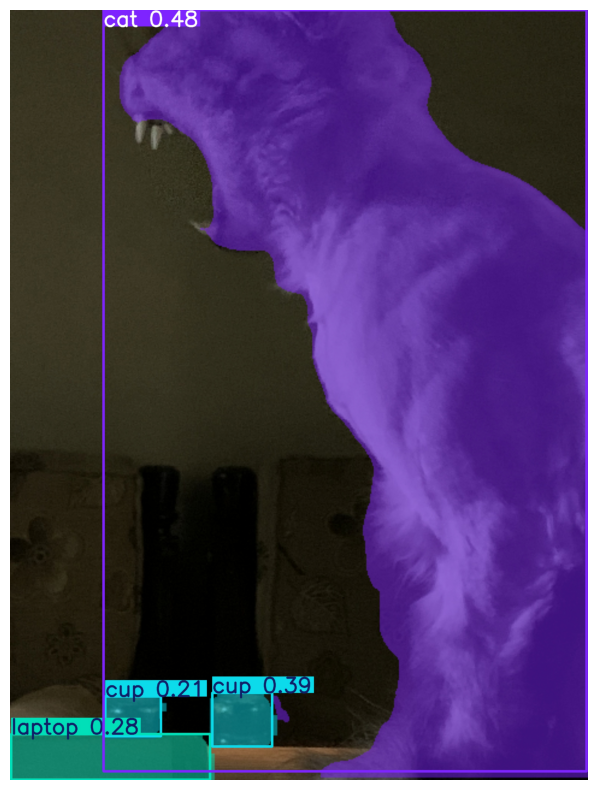

Segmented Objects:
Class: cat, Confidence: 0.48
Class: cup, Confidence: 0.39
Class: laptop, Confidence: 0.28
Class: cup, Confidence: 0.21


In [ ]:
image_path = "/content/Zaki.HEIC"
segment_image(image_path)


image 1/1 /content/Zaki.HEIC: 640x480 1 cat, 1 cup, 1 laptop, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


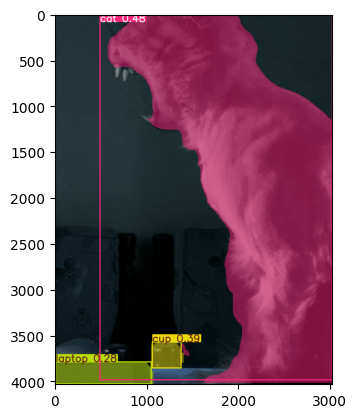

In [ ]:
res = model(image_path)

plt.imshow(res[0].plot())
plt.show()

In [7]:
def segment_video(video_path, output_path, confidence=0.5):
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    for _ in tqdm(range(total_frames)):  # Add progress bar
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame, task='segment', conf=confidence)
        segmented_frame = results[0].plot()
        out.write(segmented_frame)

    cap.release()
    out.release()
    print(f"Segmented video saved as {output_path}")


# Video Segmentation Example

In [8]:
video_path = "/content/person-bicycle-car-detection.mp4"
output_path = '/content/segmented_video.mp4'
segment_video(video_path, output_path)

  0%|          | 0/647 [00:00<?, ?it/s]


0: 384x640 (no detections), 335.1ms
Speed: 16.5ms preprocess, 335.1ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)


  0%|          | 1/647 [00:04<44:11,  4.10s/it]


0: 384x640 (no detections), 181.9ms
Speed: 4.4ms preprocess, 181.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  0%|          | 2/647 [00:04<19:27,  1.81s/it]


0: 384x640 (no detections), 178.1ms
Speed: 3.3ms preprocess, 178.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  0%|          | 3/647 [00:04<11:32,  1.08s/it]


0: 384x640 (no detections), 176.4ms
Speed: 3.2ms preprocess, 176.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 4/647 [00:04<07:49,  1.37it/s]


0: 384x640 (no detections), 176.0ms
Speed: 4.3ms preprocess, 176.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 5/647 [00:04<05:45,  1.86it/s]


0: 384x640 (no detections), 178.0ms
Speed: 3.7ms preprocess, 178.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 6/647 [00:05<04:30,  2.37it/s]


0: 384x640 (no detections), 193.1ms
Speed: 3.9ms preprocess, 193.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 7/647 [00:05<03:47,  2.81it/s]


0: 384x640 (no detections), 183.7ms
Speed: 3.1ms preprocess, 183.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|          | 8/647 [00:05<03:17,  3.24it/s]


0: 384x640 (no detections), 196.8ms
Speed: 5.9ms preprocess, 196.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  1%|▏         | 9/647 [00:05<02:59,  3.56it/s]


0: 384x640 (no detections), 180.3ms
Speed: 6.0ms preprocess, 180.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 10/647 [00:05<02:44,  3.88it/s]


0: 384x640 (no detections), 189.4ms
Speed: 4.4ms preprocess, 189.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 11/647 [00:06<02:35,  4.09it/s]


0: 384x640 (no detections), 183.2ms
Speed: 4.0ms preprocess, 183.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 12/647 [00:06<02:27,  4.31it/s]


0: 384x640 (no detections), 176.0ms
Speed: 4.1ms preprocess, 176.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 13/647 [00:06<02:20,  4.50it/s]


0: 384x640 (no detections), 190.6ms
Speed: 3.1ms preprocess, 190.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 14/647 [00:06<02:18,  4.57it/s]


0: 384x640 (no detections), 171.1ms
Speed: 3.5ms preprocess, 171.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 15/647 [00:06<02:13,  4.75it/s]


0: 384x640 1 person, 197.3ms
Speed: 3.9ms preprocess, 197.3ms inference, 21.0ms postprocess per image at shape (1, 3, 384, 640)


  2%|▏         | 16/647 [00:07<02:26,  4.30it/s]


0: 384x640 1 person, 178.3ms
Speed: 3.2ms preprocess, 178.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 17/647 [00:07<02:25,  4.32it/s]


0: 384x640 1 person, 188.6ms
Speed: 4.2ms preprocess, 188.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 18/647 [00:07<02:26,  4.30it/s]


0: 384x640 1 person, 166.7ms
Speed: 3.6ms preprocess, 166.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 19/647 [00:07<02:22,  4.40it/s]


0: 384x640 1 person, 186.4ms
Speed: 5.2ms preprocess, 186.4ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 20/647 [00:08<02:24,  4.33it/s]


0: 384x640 1 person, 181.0ms
Speed: 6.3ms preprocess, 181.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 21/647 [00:08<02:24,  4.34it/s]


0: 384x640 1 person, 175.8ms
Speed: 3.5ms preprocess, 175.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


  3%|▎         | 22/647 [00:08<02:22,  4.37it/s]


0: 384x640 1 person, 188.2ms
Speed: 4.7ms preprocess, 188.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  4%|▎         | 23/647 [00:08<02:24,  4.32it/s]


0: 384x640 1 person, 184.2ms
Speed: 3.3ms preprocess, 184.2ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  4%|▎         | 24/647 [00:09<02:23,  4.33it/s]


0: 384x640 1 person, 194.7ms
Speed: 4.9ms preprocess, 194.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 25/647 [00:09<02:25,  4.27it/s]


0: 384x640 1 person, 170.6ms
Speed: 3.8ms preprocess, 170.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 26/647 [00:09<02:22,  4.37it/s]


0: 384x640 1 person, 230.1ms
Speed: 4.6ms preprocess, 230.1ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 27/647 [00:09<02:33,  4.04it/s]


0: 384x640 1 person, 291.5ms
Speed: 3.3ms preprocess, 291.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 28/647 [00:10<02:52,  3.58it/s]


0: 384x640 1 person, 267.8ms
Speed: 3.4ms preprocess, 267.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


  4%|▍         | 29/647 [00:10<03:02,  3.38it/s]


0: 384x640 1 person, 266.5ms
Speed: 3.3ms preprocess, 266.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


  5%|▍         | 30/647 [00:10<03:09,  3.25it/s]


0: 384x640 1 person, 267.7ms
Speed: 3.5ms preprocess, 267.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


  5%|▍         | 31/647 [00:11<03:12,  3.20it/s]


0: 384x640 1 person, 264.0ms
Speed: 3.7ms preprocess, 264.0ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


  5%|▍         | 32/647 [00:11<03:14,  3.16it/s]


0: 384x640 1 person, 283.8ms
Speed: 5.9ms preprocess, 283.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


  5%|▌         | 33/647 [00:11<03:19,  3.07it/s]


0: 384x640 1 person, 289.8ms
Speed: 5.2ms preprocess, 289.8ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


  5%|▌         | 34/647 [00:12<03:25,  2.98it/s]


0: 384x640 1 person, 267.0ms
Speed: 3.3ms preprocess, 267.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


  5%|▌         | 35/647 [00:12<03:23,  3.01it/s]


0: 384x640 1 person, 268.9ms
Speed: 3.3ms preprocess, 268.9ms inference, 10.1ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 36/647 [00:12<03:24,  2.99it/s]


0: 384x640 1 person, 304.5ms
Speed: 3.4ms preprocess, 304.5ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 37/647 [00:13<03:31,  2.89it/s]


0: 384x640 1 person, 177.8ms
Speed: 3.2ms preprocess, 177.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 38/647 [00:13<03:08,  3.23it/s]


0: 384x640 1 person, 175.1ms
Speed: 6.0ms preprocess, 175.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 39/647 [00:13<02:52,  3.53it/s]


0: 384x640 1 person, 173.5ms
Speed: 4.5ms preprocess, 173.5ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


  6%|▌         | 40/647 [00:13<02:42,  3.73it/s]


0: 384x640 1 person, 181.0ms
Speed: 4.0ms preprocess, 181.0ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


  6%|▋         | 41/647 [00:14<02:35,  3.89it/s]


0: 384x640 1 person, 182.1ms
Speed: 3.2ms preprocess, 182.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


  6%|▋         | 42/647 [00:14<02:29,  4.04it/s]


0: 384x640 1 person, 179.7ms
Speed: 2.6ms preprocess, 179.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 43/647 [00:14<02:25,  4.16it/s]


0: 384x640 1 person, 169.6ms
Speed: 3.2ms preprocess, 169.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 44/647 [00:14<02:20,  4.30it/s]


0: 384x640 1 person, 188.3ms
Speed: 3.9ms preprocess, 188.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 45/647 [00:15<02:19,  4.30it/s]


0: 384x640 1 person, 192.0ms
Speed: 3.2ms preprocess, 192.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 46/647 [00:15<02:20,  4.27it/s]


0: 384x640 1 person, 178.2ms
Speed: 3.3ms preprocess, 178.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 47/647 [00:15<02:18,  4.33it/s]


0: 384x640 1 person, 170.3ms
Speed: 5.1ms preprocess, 170.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  7%|▋         | 48/647 [00:15<02:16,  4.40it/s]


0: 384x640 1 person, 171.1ms
Speed: 5.5ms preprocess, 171.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 49/647 [00:15<02:14,  4.45it/s]


0: 384x640 1 person, 196.8ms
Speed: 3.2ms preprocess, 196.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 50/647 [00:16<02:18,  4.31it/s]


0: 384x640 1 person, 174.7ms
Speed: 4.9ms preprocess, 174.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 51/647 [00:16<02:15,  4.38it/s]


0: 384x640 1 person, 170.9ms
Speed: 4.9ms preprocess, 170.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 52/647 [00:16<02:13,  4.46it/s]


0: 384x640 1 person, 171.0ms
Speed: 4.4ms preprocess, 171.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 53/647 [00:16<02:11,  4.52it/s]


0: 384x640 1 person, 187.8ms
Speed: 4.7ms preprocess, 187.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


  8%|▊         | 54/647 [00:17<02:13,  4.44it/s]


0: 384x640 1 person, 195.9ms
Speed: 3.2ms preprocess, 195.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


  9%|▊         | 55/647 [00:17<02:16,  4.34it/s]


0: 384x640 1 person, 173.0ms
Speed: 3.8ms preprocess, 173.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  9%|▊         | 56/647 [00:17<02:13,  4.41it/s]


0: 384x640 1 person, 173.5ms
Speed: 3.9ms preprocess, 173.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 57/647 [00:17<02:12,  4.45it/s]


0: 384x640 1 person, 177.9ms
Speed: 3.9ms preprocess, 177.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 58/647 [00:18<02:12,  4.46it/s]


0: 384x640 1 person, 207.3ms
Speed: 4.1ms preprocess, 207.3ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 59/647 [00:18<02:16,  4.30it/s]


0: 384x640 1 person, 176.4ms
Speed: 3.5ms preprocess, 176.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 60/647 [00:18<02:14,  4.37it/s]


0: 384x640 1 person, 168.4ms
Speed: 4.0ms preprocess, 168.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


  9%|▉         | 61/647 [00:18<02:11,  4.45it/s]


0: 384x640 1 person, 169.7ms
Speed: 4.1ms preprocess, 169.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 10%|▉         | 62/647 [00:18<02:09,  4.51it/s]


0: 384x640 1 person, 182.2ms
Speed: 3.7ms preprocess, 182.2ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


 10%|▉         | 63/647 [00:19<02:12,  4.39it/s]


0: 384x640 1 person, 182.6ms
Speed: 2.9ms preprocess, 182.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 10%|▉         | 64/647 [00:19<02:13,  4.38it/s]


0: 384x640 1 person, 180.5ms
Speed: 8.6ms preprocess, 180.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 65/647 [00:19<02:13,  4.34it/s]


0: 384x640 1 person, 171.1ms
Speed: 3.2ms preprocess, 171.1ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 66/647 [00:19<02:11,  4.44it/s]


0: 384x640 1 person, 170.4ms
Speed: 3.1ms preprocess, 170.4ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


 10%|█         | 67/647 [00:20<02:09,  4.48it/s]


0: 384x640 1 person, 199.8ms
Speed: 5.4ms preprocess, 199.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 68/647 [00:20<02:14,  4.31it/s]


0: 384x640 1 person, 172.8ms
Speed: 4.7ms preprocess, 172.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 69/647 [00:20<02:11,  4.40it/s]


0: 384x640 1 person, 170.9ms
Speed: 3.9ms preprocess, 170.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 70/647 [00:20<02:09,  4.47it/s]


0: 384x640 1 person, 172.4ms
Speed: 3.3ms preprocess, 172.4ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 71/647 [00:20<02:08,  4.50it/s]


0: 384x640 1 person, 186.1ms
Speed: 6.6ms preprocess, 186.1ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


 11%|█         | 72/647 [00:21<02:12,  4.34it/s]


0: 384x640 1 person, 176.6ms
Speed: 4.1ms preprocess, 176.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


 11%|█▏        | 73/647 [00:21<02:11,  4.37it/s]


0: 384x640 1 person, 172.7ms
Speed: 3.8ms preprocess, 172.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


 11%|█▏        | 74/647 [00:21<02:09,  4.42it/s]


0: 384x640 1 person, 172.8ms
Speed: 3.3ms preprocess, 172.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 75/647 [00:21<02:09,  4.42it/s]


0: 384x640 1 person, 171.6ms
Speed: 5.6ms preprocess, 171.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 76/647 [00:22<02:07,  4.47it/s]


0: 384x640 1 person, 199.8ms
Speed: 3.4ms preprocess, 199.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 77/647 [00:22<02:11,  4.32it/s]


0: 384x640 1 person, 171.6ms
Speed: 5.0ms preprocess, 171.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 78/647 [00:22<02:09,  4.41it/s]


0: 384x640 1 person, 172.9ms
Speed: 3.6ms preprocess, 172.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 79/647 [00:22<02:07,  4.46it/s]


0: 384x640 1 person, 178.5ms
Speed: 4.3ms preprocess, 178.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


 12%|█▏        | 80/647 [00:22<02:06,  4.47it/s]


0: 384x640 1 person, 203.9ms
Speed: 3.8ms preprocess, 203.9ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 81/647 [00:23<02:13,  4.25it/s]


0: 384x640 1 person, 262.8ms
Speed: 3.9ms preprocess, 262.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 82/647 [00:23<02:27,  3.84it/s]


0: 384x640 1 person, 260.8ms
Speed: 3.2ms preprocess, 260.8ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 83/647 [00:23<02:36,  3.60it/s]


0: 384x640 1 person, 283.7ms
Speed: 5.6ms preprocess, 283.7ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 84/647 [00:24<02:52,  3.27it/s]


0: 384x640 (no detections), 269.0ms
Speed: 5.8ms preprocess, 269.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 85/647 [00:24<02:50,  3.29it/s]


0: 384x640 (no detections), 251.6ms
Speed: 3.5ms preprocess, 251.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 86/647 [00:24<02:45,  3.39it/s]


0: 384x640 (no detections), 263.4ms
Speed: 3.3ms preprocess, 263.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 13%|█▎        | 87/647 [00:25<02:43,  3.42it/s]


0: 384x640 (no detections), 290.3ms
Speed: 6.2ms preprocess, 290.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▎        | 88/647 [00:25<02:50,  3.29it/s]


0: 384x640 (no detections), 280.3ms
Speed: 3.4ms preprocess, 280.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 89/647 [00:25<02:49,  3.29it/s]


0: 384x640 (no detections), 266.6ms
Speed: 4.0ms preprocess, 266.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 90/647 [00:26<02:47,  3.32it/s]


0: 384x640 (no detections), 271.3ms
Speed: 3.2ms preprocess, 271.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 91/647 [00:26<02:46,  3.34it/s]


0: 384x640 (no detections), 293.0ms
Speed: 3.4ms preprocess, 293.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 92/647 [00:26<02:48,  3.30it/s]


0: 384x640 (no detections), 167.5ms
Speed: 3.2ms preprocess, 167.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 14%|█▍        | 93/647 [00:26<02:28,  3.73it/s]


0: 384x640 (no detections), 177.6ms
Speed: 3.4ms preprocess, 177.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 94/647 [00:27<02:15,  4.07it/s]


0: 384x640 (no detections), 185.8ms
Speed: 3.3ms preprocess, 185.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 95/647 [00:27<02:08,  4.29it/s]


0: 384x640 (no detections), 172.7ms
Speed: 3.2ms preprocess, 172.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 96/647 [00:27<02:01,  4.54it/s]


0: 384x640 (no detections), 185.2ms
Speed: 3.1ms preprocess, 185.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▍        | 97/647 [00:27<01:58,  4.65it/s]


0: 384x640 (no detections), 167.8ms
Speed: 3.3ms preprocess, 167.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▌        | 98/647 [00:27<01:54,  4.79it/s]


0: 384x640 (no detections), 173.3ms
Speed: 3.6ms preprocess, 173.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▌        | 99/647 [00:28<01:51,  4.90it/s]


0: 384x640 (no detections), 194.1ms
Speed: 3.2ms preprocess, 194.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 15%|█▌        | 100/647 [00:28<01:53,  4.81it/s]


0: 384x640 (no detections), 178.5ms
Speed: 5.8ms preprocess, 178.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 101/647 [00:28<01:52,  4.86it/s]


0: 384x640 (no detections), 180.7ms
Speed: 4.6ms preprocess, 180.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 102/647 [00:28<01:51,  4.89it/s]


0: 384x640 (no detections), 167.9ms
Speed: 3.1ms preprocess, 167.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 103/647 [00:28<01:48,  5.00it/s]


0: 384x640 (no detections), 167.9ms
Speed: 3.9ms preprocess, 167.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 104/647 [00:29<01:46,  5.08it/s]


0: 384x640 (no detections), 191.8ms
Speed: 3.2ms preprocess, 191.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▌        | 105/647 [00:29<01:49,  4.96it/s]


0: 384x640 (no detections), 184.5ms
Speed: 3.7ms preprocess, 184.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 16%|█▋        | 106/647 [00:29<01:49,  4.94it/s]


0: 384x640 (no detections), 189.5ms
Speed: 4.0ms preprocess, 189.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 107/647 [00:29<01:50,  4.87it/s]


0: 384x640 (no detections), 175.0ms
Speed: 3.9ms preprocess, 175.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 108/647 [00:29<01:48,  4.95it/s]


0: 384x640 (no detections), 177.5ms
Speed: 3.2ms preprocess, 177.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 109/647 [00:30<01:47,  4.98it/s]


0: 384x640 (no detections), 197.2ms
Speed: 3.5ms preprocess, 197.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 110/647 [00:30<01:50,  4.85it/s]


0: 384x640 (no detections), 174.6ms
Speed: 4.0ms preprocess, 174.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 111/647 [00:30<01:48,  4.94it/s]


0: 384x640 (no detections), 189.6ms
Speed: 5.1ms preprocess, 189.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 112/647 [00:30<01:49,  4.88it/s]


0: 384x640 (no detections), 169.8ms
Speed: 3.8ms preprocess, 169.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 17%|█▋        | 113/647 [00:30<01:47,  4.97it/s]


0: 384x640 (no detections), 171.0ms
Speed: 3.1ms preprocess, 171.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 114/647 [00:31<01:45,  5.07it/s]


0: 384x640 (no detections), 191.7ms
Speed: 3.1ms preprocess, 191.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 115/647 [00:31<01:47,  4.97it/s]


0: 384x640 (no detections), 172.2ms
Speed: 4.6ms preprocess, 172.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 116/647 [00:31<01:45,  5.02it/s]


0: 384x640 (no detections), 182.3ms
Speed: 4.2ms preprocess, 182.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 117/647 [00:31<01:46,  4.97it/s]


0: 384x640 (no detections), 172.8ms
Speed: 3.6ms preprocess, 172.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 118/647 [00:31<01:44,  5.05it/s]


0: 384x640 (no detections), 171.8ms
Speed: 3.7ms preprocess, 171.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 18%|█▊        | 119/647 [00:32<01:43,  5.11it/s]


0: 384x640 (no detections), 205.8ms
Speed: 3.2ms preprocess, 205.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▊        | 120/647 [00:32<01:47,  4.91it/s]


0: 384x640 (no detections), 177.1ms
Speed: 3.4ms preprocess, 177.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▊        | 121/647 [00:32<01:46,  4.95it/s]


0: 384x640 (no detections), 170.0ms
Speed: 3.5ms preprocess, 170.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 122/647 [00:32<01:45,  4.98it/s]


0: 384x640 (no detections), 181.5ms
Speed: 3.2ms preprocess, 181.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 123/647 [00:32<01:45,  4.96it/s]


0: 384x640 (no detections), 185.2ms
Speed: 3.6ms preprocess, 185.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 124/647 [00:33<01:46,  4.93it/s]


0: 384x640 (no detections), 186.9ms
Speed: 3.3ms preprocess, 186.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 125/647 [00:33<01:46,  4.91it/s]


0: 384x640 (no detections), 177.4ms
Speed: 3.1ms preprocess, 177.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 19%|█▉        | 126/647 [00:33<01:45,  4.94it/s]


0: 384x640 (no detections), 166.1ms
Speed: 3.9ms preprocess, 166.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 20%|█▉        | 127/647 [00:33<01:42,  5.05it/s]


0: 384x640 (no detections), 178.4ms
Speed: 5.6ms preprocess, 178.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 20%|█▉        | 128/647 [00:33<01:43,  5.04it/s]


0: 384x640 (no detections), 179.2ms
Speed: 3.6ms preprocess, 179.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 20%|█▉        | 129/647 [00:34<01:43,  5.00it/s]


0: 384x640 (no detections), 198.0ms
Speed: 3.3ms preprocess, 198.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 20%|██        | 130/647 [00:34<01:46,  4.86it/s]


0: 384x640 (no detections), 185.4ms
Speed: 3.9ms preprocess, 185.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 20%|██        | 131/647 [00:34<01:46,  4.83it/s]


0: 384x640 (no detections), 173.9ms
Speed: 3.3ms preprocess, 173.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 20%|██        | 132/647 [00:34<01:45,  4.90it/s]


0: 384x640 (no detections), 197.1ms
Speed: 6.6ms preprocess, 197.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 133/647 [00:34<01:47,  4.78it/s]


0: 384x640 (no detections), 183.6ms
Speed: 3.2ms preprocess, 183.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 134/647 [00:35<01:46,  4.81it/s]


0: 384x640 (no detections), 190.8ms
Speed: 4.0ms preprocess, 190.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 135/647 [00:35<01:46,  4.79it/s]


0: 384x640 (no detections), 171.5ms
Speed: 3.5ms preprocess, 171.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 136/647 [00:35<01:44,  4.89it/s]


0: 384x640 (no detections), 168.1ms
Speed: 5.5ms preprocess, 168.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 21%|██        | 137/647 [00:35<01:42,  4.99it/s]


0: 384x640 (no detections), 183.6ms
Speed: 3.5ms preprocess, 183.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 21%|██▏       | 138/647 [00:35<01:42,  4.95it/s]


0: 384x640 (no detections), 184.0ms
Speed: 3.3ms preprocess, 184.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 21%|██▏       | 139/647 [00:36<01:42,  4.93it/s]


0: 384x640 (no detections), 191.9ms
Speed: 3.5ms preprocess, 191.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 140/647 [00:36<01:44,  4.84it/s]


0: 384x640 (no detections), 175.4ms
Speed: 4.0ms preprocess, 175.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 141/647 [00:36<01:43,  4.89it/s]


0: 384x640 (no detections), 238.5ms
Speed: 7.5ms preprocess, 238.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 142/647 [00:36<01:52,  4.47it/s]


0: 384x640 (no detections), 277.3ms
Speed: 5.0ms preprocess, 277.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 143/647 [00:37<02:04,  4.04it/s]


0: 384x640 (no detections), 294.5ms
Speed: 3.2ms preprocess, 294.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 144/647 [00:37<02:14,  3.75it/s]


0: 384x640 (no detections), 253.5ms
Speed: 3.8ms preprocess, 253.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 22%|██▏       | 145/647 [00:37<02:15,  3.70it/s]


0: 384x640 (no detections), 263.6ms
Speed: 3.9ms preprocess, 263.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 146/647 [00:37<02:18,  3.63it/s]


0: 384x640 (no detections), 270.8ms
Speed: 3.5ms preprocess, 270.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 147/647 [00:38<02:21,  3.54it/s]


0: 384x640 (no detections), 271.3ms
Speed: 3.2ms preprocess, 271.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 148/647 [00:38<02:22,  3.49it/s]


0: 384x640 (no detections), 265.6ms
Speed: 4.2ms preprocess, 265.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 149/647 [00:38<02:22,  3.50it/s]


0: 384x640 (no detections), 285.9ms
Speed: 3.9ms preprocess, 285.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 150/647 [00:39<02:25,  3.41it/s]


0: 384x640 (no detections), 281.8ms
Speed: 3.3ms preprocess, 281.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 151/647 [00:39<02:26,  3.38it/s]


0: 384x640 (no detections), 267.5ms
Speed: 3.3ms preprocess, 267.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 23%|██▎       | 152/647 [00:39<02:25,  3.41it/s]


0: 384x640 (no detections), 292.1ms
Speed: 3.7ms preprocess, 292.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▎       | 153/647 [00:40<02:28,  3.34it/s]


0: 384x640 (no detections), 227.2ms
Speed: 3.9ms preprocess, 227.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 154/647 [00:40<02:19,  3.53it/s]


0: 384x640 (no detections), 171.9ms
Speed: 3.3ms preprocess, 171.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 155/647 [00:40<02:06,  3.89it/s]


0: 384x640 (no detections), 166.3ms
Speed: 3.2ms preprocess, 166.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 156/647 [00:40<01:55,  4.24it/s]


0: 384x640 (no detections), 170.1ms
Speed: 3.4ms preprocess, 170.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 157/647 [00:40<01:49,  4.50it/s]


0: 384x640 (no detections), 185.5ms
Speed: 3.3ms preprocess, 185.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 24%|██▍       | 158/647 [00:41<01:46,  4.60it/s]


0: 384x640 (no detections), 197.5ms
Speed: 3.2ms preprocess, 197.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▍       | 159/647 [00:41<01:46,  4.60it/s]


0: 384x640 (no detections), 176.7ms
Speed: 3.7ms preprocess, 176.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▍       | 160/647 [00:41<01:42,  4.74it/s]


0: 384x640 (no detections), 165.9ms
Speed: 3.4ms preprocess, 165.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▍       | 161/647 [00:41<01:38,  4.91it/s]


0: 384x640 (no detections), 175.5ms
Speed: 3.4ms preprocess, 175.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▌       | 162/647 [00:41<01:37,  4.97it/s]


0: 384x640 (no detections), 188.7ms
Speed: 3.3ms preprocess, 188.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▌       | 163/647 [00:42<01:38,  4.92it/s]


0: 384x640 (no detections), 184.1ms
Speed: 8.6ms preprocess, 184.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 25%|██▌       | 164/647 [00:42<01:39,  4.84it/s]


0: 384x640 (no detections), 180.9ms
Speed: 5.9ms preprocess, 180.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 165/647 [00:42<01:39,  4.86it/s]


0: 384x640 (no detections), 180.1ms
Speed: 4.5ms preprocess, 180.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 166/647 [00:42<01:38,  4.90it/s]


0: 384x640 (no detections), 179.3ms
Speed: 4.9ms preprocess, 179.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 167/647 [00:42<01:37,  4.93it/s]


0: 384x640 (no detections), 194.9ms
Speed: 4.1ms preprocess, 194.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 168/647 [00:43<01:39,  4.82it/s]


0: 384x640 (no detections), 188.1ms
Speed: 3.9ms preprocess, 188.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▌       | 169/647 [00:43<01:39,  4.79it/s]


0: 384x640 (no detections), 180.0ms
Speed: 7.4ms preprocess, 180.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▋       | 170/647 [00:43<01:38,  4.82it/s]


0: 384x640 (no detections), 173.0ms
Speed: 3.2ms preprocess, 173.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 26%|██▋       | 171/647 [00:43<01:36,  4.91it/s]


0: 384x640 (no detections), 171.3ms
Speed: 3.4ms preprocess, 171.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 172/647 [00:43<01:34,  5.02it/s]


0: 384x640 (no detections), 195.3ms
Speed: 3.2ms preprocess, 195.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 173/647 [00:44<01:37,  4.87it/s]


0: 384x640 (no detections), 189.1ms
Speed: 7.8ms preprocess, 189.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 174/647 [00:44<01:38,  4.81it/s]


0: 384x640 (no detections), 169.3ms
Speed: 3.2ms preprocess, 169.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 175/647 [00:44<01:35,  4.93it/s]


0: 384x640 (no detections), 190.0ms
Speed: 3.3ms preprocess, 190.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 176/647 [00:44<01:36,  4.89it/s]


0: 384x640 (no detections), 169.2ms
Speed: 3.1ms preprocess, 169.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 27%|██▋       | 177/647 [00:44<01:33,  5.01it/s]


0: 384x640 (no detections), 191.0ms
Speed: 3.1ms preprocess, 191.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 178/647 [00:45<01:35,  4.93it/s]


0: 384x640 (no detections), 189.2ms
Speed: 5.1ms preprocess, 189.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 179/647 [00:45<01:36,  4.86it/s]


0: 384x640 (no detections), 181.6ms
Speed: 3.7ms preprocess, 181.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 180/647 [00:45<01:36,  4.86it/s]


0: 384x640 (no detections), 173.6ms
Speed: 3.4ms preprocess, 173.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 181/647 [00:45<01:34,  4.95it/s]


0: 384x640 (no detections), 183.0ms
Speed: 3.1ms preprocess, 183.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 182/647 [00:45<01:34,  4.93it/s]


0: 384x640 (no detections), 189.9ms
Speed: 4.1ms preprocess, 189.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 183/647 [00:46<01:35,  4.86it/s]


0: 384x640 (no detections), 179.0ms
Speed: 3.2ms preprocess, 179.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 28%|██▊       | 184/647 [00:46<01:34,  4.91it/s]


0: 384x640 (no detections), 179.4ms
Speed: 3.3ms preprocess, 179.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▊       | 185/647 [00:46<01:33,  4.93it/s]


0: 384x640 (no detections), 176.7ms
Speed: 4.7ms preprocess, 176.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▊       | 186/647 [00:46<01:33,  4.96it/s]


0: 384x640 (no detections), 182.4ms
Speed: 3.4ms preprocess, 182.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 187/647 [00:47<01:33,  4.93it/s]


0: 384x640 (no detections), 196.2ms
Speed: 3.5ms preprocess, 196.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 188/647 [00:47<01:34,  4.84it/s]


0: 384x640 (no detections), 180.3ms
Speed: 3.6ms preprocess, 180.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 189/647 [00:47<01:33,  4.88it/s]


0: 384x640 1 cell phone, 171.6ms
Speed: 3.8ms preprocess, 171.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 29%|██▉       | 190/647 [00:47<01:35,  4.79it/s]


0: 384x640 1 cell phone, 168.6ms
Speed: 3.7ms preprocess, 168.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 30%|██▉       | 191/647 [00:47<01:36,  4.73it/s]


0: 384x640 1 cell phone, 170.9ms
Speed: 3.1ms preprocess, 170.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 30%|██▉       | 192/647 [00:48<01:37,  4.68it/s]


0: 384x640 1 cell phone, 186.9ms
Speed: 3.1ms preprocess, 186.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 30%|██▉       | 193/647 [00:48<01:41,  4.49it/s]


0: 384x640 1 cell phone, 176.1ms
Speed: 6.0ms preprocess, 176.1ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


 30%|██▉       | 194/647 [00:48<01:41,  4.45it/s]


0: 384x640 1 cell phone, 171.2ms
Speed: 5.4ms preprocess, 171.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 30%|███       | 195/647 [00:48<01:40,  4.50it/s]


0: 384x640 (no detections), 172.3ms
Speed: 3.9ms preprocess, 172.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 30%|███       | 196/647 [00:48<01:36,  4.66it/s]


0: 384x640 1 cell phone, 196.8ms
Speed: 5.5ms preprocess, 196.8ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


 30%|███       | 197/647 [00:49<01:40,  4.47it/s]


0: 384x640 (no detections), 181.4ms
Speed: 3.1ms preprocess, 181.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 198/647 [00:49<01:37,  4.60it/s]


0: 384x640 (no detections), 195.6ms
Speed: 3.6ms preprocess, 195.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 199/647 [00:49<01:36,  4.63it/s]


0: 384x640 (no detections), 167.2ms
Speed: 3.0ms preprocess, 167.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 200/647 [00:49<01:32,  4.84it/s]


0: 384x640 (no detections), 170.7ms
Speed: 3.4ms preprocess, 170.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 201/647 [00:50<01:30,  4.95it/s]


0: 384x640 1 car, 196.7ms
Speed: 3.2ms preprocess, 196.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 31%|███       | 202/647 [00:50<01:37,  4.58it/s]


0: 384x640 1 car, 270.3ms
Speed: 5.8ms preprocess, 270.3ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


 31%|███▏      | 203/647 [00:50<01:53,  3.92it/s]


0: 384x640 1 car, 270.9ms
Speed: 5.1ms preprocess, 270.9ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 204/647 [00:50<02:04,  3.56it/s]


0: 384x640 (no detections), 277.6ms
Speed: 5.0ms preprocess, 277.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 205/647 [00:51<02:07,  3.47it/s]


0: 384x640 1 car, 257.5ms
Speed: 3.2ms preprocess, 257.5ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 206/647 [00:51<02:12,  3.32it/s]


0: 384x640 1 car, 255.6ms
Speed: 5.5ms preprocess, 255.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 207/647 [00:51<02:15,  3.24it/s]


0: 384x640 1 car, 278.2ms
Speed: 6.6ms preprocess, 278.2ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 208/647 [00:52<02:20,  3.13it/s]


0: 384x640 1 car, 279.0ms
Speed: 5.3ms preprocess, 279.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 209/647 [00:52<02:23,  3.04it/s]


0: 384x640 1 car, 261.3ms
Speed: 3.2ms preprocess, 261.3ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


 32%|███▏      | 210/647 [00:52<02:24,  3.02it/s]


0: 384x640 1 car, 275.5ms
Speed: 3.2ms preprocess, 275.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 211/647 [00:53<02:24,  3.01it/s]


0: 384x640 1 car, 254.8ms
Speed: 3.2ms preprocess, 254.8ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 212/647 [00:53<02:22,  3.05it/s]


0: 384x640 1 car, 171.9ms
Speed: 4.3ms preprocess, 171.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 213/647 [00:53<02:08,  3.38it/s]


0: 384x640 1 car, 177.0ms
Speed: 5.5ms preprocess, 177.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 214/647 [00:54<01:59,  3.64it/s]


0: 384x640 1 car, 191.1ms
Speed: 5.6ms preprocess, 191.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 215/647 [00:54<01:53,  3.79it/s]


0: 384x640 1 car, 176.0ms
Speed: 3.1ms preprocess, 176.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 33%|███▎      | 216/647 [00:54<01:48,  3.97it/s]


0: 384x640 1 car, 180.9ms
Speed: 3.1ms preprocess, 180.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▎      | 217/647 [00:54<01:44,  4.10it/s]


0: 384x640 1 car, 168.8ms
Speed: 3.6ms preprocess, 168.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▎      | 218/647 [00:54<01:40,  4.25it/s]


0: 384x640 1 car, 189.9ms
Speed: 3.2ms preprocess, 189.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 219/647 [00:55<01:43,  4.14it/s]


0: 384x640 1 car, 176.8ms
Speed: 3.3ms preprocess, 176.8ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 220/647 [00:55<01:40,  4.23it/s]


0: 384x640 1 car, 170.4ms
Speed: 3.3ms preprocess, 170.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 221/647 [00:55<01:40,  4.24it/s]


0: 384x640 1 car, 172.9ms
Speed: 3.3ms preprocess, 172.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 222/647 [00:55<01:38,  4.33it/s]


0: 384x640 1 car, 176.3ms
Speed: 3.2ms preprocess, 176.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 34%|███▍      | 223/647 [00:56<01:37,  4.37it/s]


0: 384x640 1 car, 190.3ms
Speed: 3.3ms preprocess, 190.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▍      | 224/647 [00:56<01:38,  4.28it/s]


0: 384x640 1 car, 170.5ms
Speed: 5.5ms preprocess, 170.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▍      | 225/647 [00:56<01:37,  4.35it/s]


0: 384x640 1 car, 185.7ms
Speed: 6.4ms preprocess, 185.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▍      | 226/647 [00:56<01:37,  4.32it/s]


0: 384x640 1 car, 182.8ms
Speed: 4.3ms preprocess, 182.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▌      | 227/647 [00:57<01:37,  4.32it/s]


0: 384x640 1 car, 196.8ms
Speed: 4.5ms preprocess, 196.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▌      | 228/647 [00:57<01:38,  4.25it/s]


0: 384x640 1 car, 178.7ms
Speed: 4.1ms preprocess, 178.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 35%|███▌      | 229/647 [00:57<01:37,  4.31it/s]


0: 384x640 (no detections), 172.6ms
Speed: 4.1ms preprocess, 172.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 230/647 [00:57<01:32,  4.50it/s]


0: 384x640 1 car, 181.2ms
Speed: 4.0ms preprocess, 181.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 231/647 [00:57<01:33,  4.45it/s]


0: 384x640 (no detections), 178.1ms
Speed: 6.0ms preprocess, 178.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 232/647 [00:58<01:30,  4.58it/s]


0: 384x640 (no detections), 177.8ms
Speed: 3.3ms preprocess, 177.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 233/647 [00:58<01:28,  4.66it/s]


0: 384x640 (no detections), 173.0ms
Speed: 3.1ms preprocess, 173.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▌      | 234/647 [00:58<01:25,  4.83it/s]


0: 384x640 (no detections), 173.5ms
Speed: 3.2ms preprocess, 173.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▋      | 235/647 [00:58<01:23,  4.95it/s]


0: 384x640 (no detections), 183.3ms
Speed: 3.2ms preprocess, 183.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 36%|███▋      | 236/647 [00:58<01:22,  4.96it/s]


0: 384x640 (no detections), 177.2ms
Speed: 3.4ms preprocess, 177.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 237/647 [00:59<01:22,  4.99it/s]


0: 384x640 (no detections), 184.8ms
Speed: 3.2ms preprocess, 184.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 238/647 [00:59<01:22,  4.94it/s]


0: 384x640 (no detections), 171.7ms
Speed: 4.2ms preprocess, 171.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 239/647 [00:59<01:21,  5.01it/s]


0: 384x640 (no detections), 173.0ms
Speed: 3.7ms preprocess, 173.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 240/647 [00:59<01:20,  5.06it/s]


0: 384x640 (no detections), 188.8ms
Speed: 3.6ms preprocess, 188.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 241/647 [00:59<01:21,  4.99it/s]


0: 384x640 (no detections), 175.1ms
Speed: 3.3ms preprocess, 175.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 37%|███▋      | 242/647 [01:00<01:20,  5.04it/s]


0: 384x640 (no detections), 190.6ms
Speed: 3.4ms preprocess, 190.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 243/647 [01:00<01:21,  4.97it/s]


0: 384x640 (no detections), 179.2ms
Speed: 3.2ms preprocess, 179.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 244/647 [01:00<01:20,  5.01it/s]


0: 384x640 (no detections), 173.3ms
Speed: 3.2ms preprocess, 173.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 245/647 [01:00<01:19,  5.08it/s]


0: 384x640 (no detections), 186.3ms
Speed: 3.1ms preprocess, 186.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 246/647 [01:00<01:19,  5.03it/s]


0: 384x640 (no detections), 173.4ms
Speed: 3.6ms preprocess, 173.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 247/647 [01:01<01:18,  5.09it/s]


0: 384x640 (no detections), 192.8ms
Speed: 3.3ms preprocess, 192.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 248/647 [01:01<01:20,  4.98it/s]


0: 384x640 (no detections), 174.1ms
Speed: 3.1ms preprocess, 174.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 38%|███▊      | 249/647 [01:01<01:18,  5.04it/s]


0: 384x640 (no detections), 173.0ms
Speed: 3.5ms preprocess, 173.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▊      | 250/647 [01:01<01:17,  5.09it/s]


0: 384x640 (no detections), 184.8ms
Speed: 3.4ms preprocess, 184.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 251/647 [01:01<01:19,  4.99it/s]


0: 384x640 (no detections), 169.6ms
Speed: 3.3ms preprocess, 169.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 252/647 [01:02<01:18,  5.04it/s]


0: 384x640 (no detections), 187.3ms
Speed: 3.3ms preprocess, 187.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 253/647 [01:02<01:19,  4.96it/s]


0: 384x640 (no detections), 170.8ms
Speed: 3.3ms preprocess, 170.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 254/647 [01:02<01:18,  5.04it/s]


0: 384x640 (no detections), 176.7ms
Speed: 3.3ms preprocess, 176.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 39%|███▉      | 255/647 [01:02<01:17,  5.07it/s]


0: 384x640 (no detections), 193.0ms
Speed: 3.1ms preprocess, 193.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 40%|███▉      | 256/647 [01:02<01:18,  4.95it/s]


0: 384x640 (no detections), 167.4ms
Speed: 3.4ms preprocess, 167.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 40%|███▉      | 257/647 [01:03<01:17,  5.03it/s]


0: 384x640 (no detections), 190.4ms
Speed: 6.5ms preprocess, 190.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 40%|███▉      | 258/647 [01:03<01:19,  4.92it/s]


0: 384x640 (no detections), 174.7ms
Speed: 4.1ms preprocess, 174.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 40%|████      | 259/647 [01:03<01:18,  4.96it/s]


0: 384x640 (no detections), 271.4ms
Speed: 3.3ms preprocess, 271.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 40%|████      | 260/647 [01:03<01:28,  4.36it/s]


0: 384x640 (no detections), 278.0ms
Speed: 3.9ms preprocess, 278.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 40%|████      | 261/647 [01:04<01:36,  3.98it/s]


0: 384x640 (no detections), 280.6ms
Speed: 5.1ms preprocess, 280.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 40%|████      | 262/647 [01:04<01:43,  3.73it/s]


0: 384x640 (no detections), 258.9ms
Speed: 3.2ms preprocess, 258.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 41%|████      | 263/647 [01:04<01:44,  3.68it/s]


0: 384x640 (no detections), 266.9ms
Speed: 3.5ms preprocess, 266.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 41%|████      | 264/647 [01:04<01:45,  3.61it/s]


0: 384x640 (no detections), 274.9ms
Speed: 3.5ms preprocess, 274.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 41%|████      | 265/647 [01:05<01:48,  3.53it/s]


0: 384x640 (no detections), 271.2ms
Speed: 3.2ms preprocess, 271.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 41%|████      | 266/647 [01:05<01:48,  3.50it/s]


0: 384x640 (no detections), 260.5ms
Speed: 3.6ms preprocess, 260.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 41%|████▏     | 267/647 [01:05<01:48,  3.52it/s]


0: 384x640 (no detections), 290.3ms
Speed: 3.3ms preprocess, 290.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 41%|████▏     | 268/647 [01:06<01:51,  3.41it/s]


0: 384x640 (no detections), 282.4ms
Speed: 3.2ms preprocess, 282.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 269/647 [01:06<01:51,  3.38it/s]


0: 384x640 (no detections), 258.4ms
Speed: 3.2ms preprocess, 258.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 270/647 [01:06<01:49,  3.45it/s]


0: 384x640 (no detections), 265.1ms
Speed: 3.4ms preprocess, 265.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 271/647 [01:07<01:48,  3.47it/s]


0: 384x640 (no detections), 199.2ms
Speed: 3.2ms preprocess, 199.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 272/647 [01:07<01:40,  3.75it/s]


0: 384x640 (no detections), 174.6ms
Speed: 3.1ms preprocess, 174.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 273/647 [01:07<01:31,  4.09it/s]


0: 384x640 (no detections), 174.5ms
Speed: 3.1ms preprocess, 174.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 42%|████▏     | 274/647 [01:07<01:25,  4.35it/s]


0: 384x640 (no detections), 177.0ms
Speed: 3.5ms preprocess, 177.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 275/647 [01:07<01:21,  4.56it/s]


0: 384x640 (no detections), 174.8ms
Speed: 3.3ms preprocess, 174.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 276/647 [01:08<01:18,  4.72it/s]


0: 384x640 (no detections), 203.1ms
Speed: 3.3ms preprocess, 203.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 277/647 [01:08<01:19,  4.66it/s]


0: 384x640 (no detections), 176.0ms
Speed: 3.1ms preprocess, 176.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 278/647 [01:08<01:17,  4.77it/s]


0: 384x640 (no detections), 172.8ms
Speed: 3.2ms preprocess, 172.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 279/647 [01:08<01:15,  4.88it/s]


0: 384x640 (no detections), 176.6ms
Speed: 3.3ms preprocess, 176.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 280/647 [01:08<01:13,  4.96it/s]


0: 384x640 (no detections), 174.2ms
Speed: 3.3ms preprocess, 174.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 43%|████▎     | 281/647 [01:09<01:12,  5.04it/s]


0: 384x640 (no detections), 218.4ms
Speed: 3.2ms preprocess, 218.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▎     | 282/647 [01:09<01:16,  4.77it/s]


0: 384x640 (no detections), 174.7ms
Speed: 3.1ms preprocess, 174.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▎     | 283/647 [01:09<01:14,  4.90it/s]


0: 384x640 (no detections), 171.8ms
Speed: 3.1ms preprocess, 171.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 284/647 [01:09<01:12,  5.01it/s]


0: 384x640 (no detections), 174.5ms
Speed: 3.2ms preprocess, 174.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 285/647 [01:09<01:11,  5.05it/s]


0: 384x640 (no detections), 174.5ms
Speed: 6.1ms preprocess, 174.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 286/647 [01:10<01:11,  5.05it/s]


0: 384x640 (no detections), 214.0ms
Speed: 3.4ms preprocess, 214.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 44%|████▍     | 287/647 [01:10<01:15,  4.79it/s]


0: 384x640 (no detections), 175.6ms
Speed: 3.2ms preprocess, 175.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▍     | 288/647 [01:10<01:13,  4.90it/s]


0: 384x640 (no detections), 185.6ms
Speed: 3.1ms preprocess, 185.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▍     | 289/647 [01:10<01:12,  4.91it/s]


0: 384x640 (no detections), 175.8ms
Speed: 3.2ms preprocess, 175.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▍     | 290/647 [01:10<01:11,  4.96it/s]


0: 384x640 (no detections), 176.4ms
Speed: 3.3ms preprocess, 176.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▍     | 291/647 [01:11<01:11,  5.00it/s]


0: 384x640 (no detections), 205.2ms
Speed: 3.3ms preprocess, 205.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▌     | 292/647 [01:11<01:13,  4.81it/s]


0: 384x640 (no detections), 173.3ms
Speed: 3.7ms preprocess, 173.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▌     | 293/647 [01:11<01:12,  4.90it/s]


0: 384x640 (no detections), 169.8ms
Speed: 3.7ms preprocess, 169.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 45%|████▌     | 294/647 [01:11<01:10,  5.01it/s]


0: 384x640 (no detections), 176.4ms
Speed: 3.2ms preprocess, 176.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 295/647 [01:11<01:09,  5.03it/s]


0: 384x640 (no detections), 174.6ms
Speed: 3.4ms preprocess, 174.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 296/647 [01:12<01:09,  5.07it/s]


0: 384x640 (no detections), 208.5ms
Speed: 3.3ms preprocess, 208.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 297/647 [01:12<01:13,  4.79it/s]


0: 384x640 (no detections), 177.6ms
Speed: 3.2ms preprocess, 177.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 298/647 [01:12<01:11,  4.86it/s]


0: 384x640 (no detections), 174.3ms
Speed: 3.4ms preprocess, 174.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▌     | 299/647 [01:12<01:10,  4.96it/s]


0: 384x640 (no detections), 173.3ms
Speed: 3.2ms preprocess, 173.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 46%|████▋     | 300/647 [01:12<01:09,  5.01it/s]


0: 384x640 (no detections), 180.4ms
Speed: 3.5ms preprocess, 180.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 301/647 [01:13<01:09,  5.00it/s]


0: 384x640 (no detections), 191.2ms
Speed: 3.6ms preprocess, 191.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 302/647 [01:13<01:10,  4.91it/s]


0: 384x640 (no detections), 192.3ms
Speed: 3.2ms preprocess, 192.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 303/647 [01:13<01:10,  4.86it/s]


0: 384x640 (no detections), 180.6ms
Speed: 3.3ms preprocess, 180.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 304/647 [01:13<01:09,  4.92it/s]


0: 384x640 (no detections), 179.6ms
Speed: 3.4ms preprocess, 179.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 305/647 [01:13<01:08,  4.96it/s]


0: 384x640 (no detections), 183.4ms
Speed: 3.4ms preprocess, 183.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 306/647 [01:14<01:08,  4.97it/s]


0: 384x640 (no detections), 200.5ms
Speed: 3.2ms preprocess, 200.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 47%|████▋     | 307/647 [01:14<01:10,  4.83it/s]


0: 384x640 (no detections), 190.7ms
Speed: 3.2ms preprocess, 190.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 308/647 [01:14<01:10,  4.81it/s]


0: 384x640 (no detections), 177.9ms
Speed: 3.4ms preprocess, 177.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 309/647 [01:14<01:09,  4.89it/s]


0: 384x640 (no detections), 177.6ms
Speed: 3.2ms preprocess, 177.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 310/647 [01:14<01:08,  4.95it/s]


0: 384x640 (no detections), 179.2ms
Speed: 3.2ms preprocess, 179.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 311/647 [01:15<01:07,  4.98it/s]


0: 384x640 (no detections), 186.6ms
Speed: 3.2ms preprocess, 186.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 312/647 [01:15<01:07,  4.94it/s]


0: 384x640 (no detections), 188.4ms
Speed: 3.1ms preprocess, 188.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 48%|████▊     | 313/647 [01:15<01:08,  4.88it/s]


0: 384x640 (no detections), 171.7ms
Speed: 3.9ms preprocess, 171.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▊     | 314/647 [01:15<01:06,  4.97it/s]


0: 384x640 (no detections), 171.8ms
Speed: 3.5ms preprocess, 171.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▊     | 315/647 [01:15<01:05,  5.06it/s]


0: 384x640 (no detections), 184.2ms
Speed: 3.3ms preprocess, 184.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 316/647 [01:16<01:06,  5.01it/s]


0: 384x640 (no detections), 186.3ms
Speed: 5.0ms preprocess, 186.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 317/647 [01:16<01:06,  4.95it/s]


0: 384x640 (no detections), 185.5ms
Speed: 3.3ms preprocess, 185.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 318/647 [01:16<01:07,  4.90it/s]


0: 384x640 (no detections), 173.1ms
Speed: 3.4ms preprocess, 173.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 319/647 [01:16<01:05,  4.99it/s]


0: 384x640 (no detections), 177.6ms
Speed: 3.4ms preprocess, 177.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 49%|████▉     | 320/647 [01:16<01:05,  5.02it/s]


0: 384x640 1 bicycle, 238.9ms
Speed: 3.3ms preprocess, 238.9ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)


 50%|████▉     | 321/647 [01:17<01:15,  4.29it/s]


0: 384x640 (no detections), 274.8ms
Speed: 3.3ms preprocess, 274.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 50%|████▉     | 322/647 [01:17<01:21,  3.97it/s]


0: 384x640 1 bicycle, 267.5ms
Speed: 5.9ms preprocess, 267.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 50%|████▉     | 323/647 [01:17<01:29,  3.61it/s]


0: 384x640 1 person, 267.2ms
Speed: 3.2ms preprocess, 267.2ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 50%|█████     | 324/647 [01:18<01:34,  3.43it/s]


0: 384x640 1 person, 261.5ms
Speed: 3.3ms preprocess, 261.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 50%|█████     | 325/647 [01:18<01:37,  3.31it/s]


0: 384x640 1 bicycle, 268.7ms
Speed: 3.6ms preprocess, 268.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)


 50%|█████     | 326/647 [01:18<01:39,  3.23it/s]


0: 384x640 (no detections), 266.1ms
Speed: 3.6ms preprocess, 266.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 327/647 [01:19<01:37,  3.29it/s]


0: 384x640 1 person, 290.4ms
Speed: 3.3ms preprocess, 290.4ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 328/647 [01:19<01:42,  3.13it/s]


0: 384x640 1 person, 1 bicycle, 282.9ms
Speed: 6.4ms preprocess, 282.9ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 329/647 [01:19<01:46,  2.98it/s]


0: 384x640 1 person, 1 bicycle, 278.7ms
Speed: 9.0ms preprocess, 278.7ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 330/647 [01:20<01:48,  2.92it/s]


0: 384x640 1 person, 1 bicycle, 280.7ms
Speed: 5.1ms preprocess, 280.7ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████     | 331/647 [01:20<01:49,  2.87it/s]


0: 384x640 1 person, 1 bicycle, 198.7ms
Speed: 3.3ms preprocess, 198.7ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████▏    | 332/647 [01:20<01:41,  3.12it/s]


0: 384x640 1 person, 1 bicycle, 181.2ms
Speed: 4.1ms preprocess, 181.2ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


 51%|█████▏    | 333/647 [01:21<01:32,  3.38it/s]


0: 384x640 1 person, 1 bicycle, 191.8ms
Speed: 3.1ms preprocess, 191.8ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 334/647 [01:21<01:28,  3.56it/s]


0: 384x640 1 bicycle, 190.2ms
Speed: 7.6ms preprocess, 190.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 335/647 [01:21<01:24,  3.70it/s]


0: 384x640 1 bicycle, 178.9ms
Speed: 3.2ms preprocess, 178.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 336/647 [01:21<01:20,  3.88it/s]


0: 384x640 (no detections), 174.6ms
Speed: 6.7ms preprocess, 174.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 337/647 [01:21<01:14,  4.17it/s]


0: 384x640 1 person, 1 bicycle, 200.1ms
Speed: 3.7ms preprocess, 200.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 338/647 [01:22<01:15,  4.10it/s]


0: 384x640 1 person, 1 bicycle, 178.1ms
Speed: 3.9ms preprocess, 178.1ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


 52%|█████▏    | 339/647 [01:22<01:14,  4.14it/s]


0: 384x640 1 bicycle, 163.4ms
Speed: 3.2ms preprocess, 163.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 340/647 [01:22<01:12,  4.26it/s]


0: 384x640 1 person, 1 bicycle, 188.2ms
Speed: 3.3ms preprocess, 188.2ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 341/647 [01:22<01:12,  4.22it/s]


0: 384x640 1 person, 1 bicycle, 193.2ms
Speed: 3.4ms preprocess, 193.2ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 342/647 [01:23<01:13,  4.13it/s]


0: 384x640 1 person, 1 bicycle, 170.9ms
Speed: 3.2ms preprocess, 170.9ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 343/647 [01:23<01:11,  4.23it/s]


0: 384x640 1 person, 1 bicycle, 172.7ms
Speed: 3.2ms preprocess, 172.7ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 344/647 [01:23<01:10,  4.29it/s]


0: 384x640 1 person, 1 bicycle, 181.4ms
Speed: 3.2ms preprocess, 181.4ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 345/647 [01:23<01:10,  4.26it/s]


0: 384x640 1 bicycle, 172.8ms
Speed: 4.2ms preprocess, 172.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 53%|█████▎    | 346/647 [01:24<01:09,  4.32it/s]


0: 384x640 1 person, 1 bicycle, 191.9ms
Speed: 5.2ms preprocess, 191.9ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▎    | 347/647 [01:24<01:11,  4.22it/s]


0: 384x640 1 person, 169.8ms
Speed: 4.0ms preprocess, 169.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 348/647 [01:24<01:09,  4.32it/s]


0: 384x640 (no detections), 178.4ms
Speed: 3.2ms preprocess, 178.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 349/647 [01:24<01:06,  4.48it/s]


0: 384x640 (no detections), 183.3ms
Speed: 6.0ms preprocess, 183.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 350/647 [01:24<01:04,  4.59it/s]


0: 384x640 (no detections), 196.2ms
Speed: 3.2ms preprocess, 196.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 351/647 [01:25<01:04,  4.62it/s]


0: 384x640 (no detections), 188.4ms
Speed: 3.6ms preprocess, 188.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 54%|█████▍    | 352/647 [01:25<01:03,  4.68it/s]


0: 384x640 (no detections), 175.9ms
Speed: 3.3ms preprocess, 175.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▍    | 353/647 [01:25<01:01,  4.81it/s]


0: 384x640 (no detections), 191.4ms
Speed: 3.6ms preprocess, 191.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▍    | 354/647 [01:25<01:01,  4.78it/s]


0: 384x640 (no detections), 178.2ms
Speed: 11.3ms preprocess, 178.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▍    | 355/647 [01:26<01:00,  4.80it/s]


0: 384x640 (no detections), 200.9ms
Speed: 3.3ms preprocess, 200.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▌    | 356/647 [01:26<01:01,  4.71it/s]


0: 384x640 (no detections), 179.0ms
Speed: 3.7ms preprocess, 179.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▌    | 357/647 [01:26<01:00,  4.81it/s]


0: 384x640 (no detections), 168.8ms
Speed: 3.8ms preprocess, 168.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▌    | 358/647 [01:26<00:58,  4.96it/s]


0: 384x640 (no detections), 177.7ms
Speed: 3.3ms preprocess, 177.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 55%|█████▌    | 359/647 [01:26<00:57,  5.01it/s]


0: 384x640 (no detections), 190.2ms
Speed: 3.2ms preprocess, 190.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 360/647 [01:27<00:58,  4.92it/s]


0: 384x640 (no detections), 192.6ms
Speed: 3.7ms preprocess, 192.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 361/647 [01:27<00:59,  4.84it/s]


0: 384x640 (no detections), 183.5ms
Speed: 3.3ms preprocess, 183.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 362/647 [01:27<00:58,  4.86it/s]


0: 384x640 (no detections), 172.5ms
Speed: 3.5ms preprocess, 172.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▌    | 363/647 [01:27<00:57,  4.97it/s]


0: 384x640 (no detections), 176.6ms
Speed: 3.4ms preprocess, 176.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▋    | 364/647 [01:27<00:56,  5.02it/s]


0: 384x640 (no detections), 190.2ms
Speed: 3.4ms preprocess, 190.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 56%|█████▋    | 365/647 [01:28<00:56,  4.96it/s]


0: 384x640 (no detections), 199.3ms
Speed: 3.2ms preprocess, 199.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 366/647 [01:28<00:58,  4.84it/s]


0: 384x640 (no detections), 176.6ms
Speed: 3.2ms preprocess, 176.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 367/647 [01:28<00:56,  4.92it/s]


0: 384x640 (no detections), 174.3ms
Speed: 3.2ms preprocess, 174.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 368/647 [01:28<00:56,  4.95it/s]


0: 384x640 (no detections), 188.1ms
Speed: 3.4ms preprocess, 188.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 369/647 [01:28<00:56,  4.91it/s]


0: 384x640 (no detections), 194.7ms
Speed: 3.2ms preprocess, 194.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 370/647 [01:29<00:57,  4.85it/s]


0: 384x640 (no detections), 206.9ms
Speed: 3.3ms preprocess, 206.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 371/647 [01:29<00:58,  4.71it/s]


0: 384x640 (no detections), 179.7ms
Speed: 3.8ms preprocess, 179.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 57%|█████▋    | 372/647 [01:29<00:57,  4.79it/s]


0: 384x640 (no detections), 182.4ms
Speed: 4.1ms preprocess, 182.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 373/647 [01:29<00:56,  4.82it/s]


0: 384x640 (no detections), 170.7ms
Speed: 3.2ms preprocess, 170.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 374/647 [01:29<00:55,  4.88it/s]


0: 384x640 (no detections), 195.2ms
Speed: 3.5ms preprocess, 195.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 375/647 [01:30<00:56,  4.79it/s]


0: 384x640 (no detections), 193.2ms
Speed: 3.4ms preprocess, 193.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 376/647 [01:30<00:56,  4.76it/s]


0: 384x640 (no detections), 177.1ms
Speed: 3.3ms preprocess, 177.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 377/647 [01:30<00:55,  4.87it/s]


0: 384x640 (no detections), 237.1ms
Speed: 3.4ms preprocess, 237.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 58%|█████▊    | 378/647 [01:30<00:59,  4.54it/s]


0: 384x640 (no detections), 275.4ms
Speed: 4.8ms preprocess, 275.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▊    | 379/647 [01:31<01:04,  4.12it/s]


0: 384x640 (no detections), 276.0ms
Speed: 3.4ms preprocess, 276.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▊    | 380/647 [01:31<01:08,  3.87it/s]


0: 384x640 (no detections), 262.3ms
Speed: 3.5ms preprocess, 262.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 381/647 [01:31<01:10,  3.77it/s]


0: 384x640 (no detections), 252.4ms
Speed: 3.5ms preprocess, 252.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 382/647 [01:31<01:10,  3.75it/s]


0: 384x640 (no detections), 281.0ms
Speed: 3.3ms preprocess, 281.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 383/647 [01:32<01:12,  3.62it/s]


0: 384x640 (no detections), 257.6ms
Speed: 3.6ms preprocess, 257.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 59%|█████▉    | 384/647 [01:32<01:12,  3.62it/s]


0: 384x640 (no detections), 264.6ms
Speed: 3.6ms preprocess, 264.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 60%|█████▉    | 385/647 [01:32<01:12,  3.59it/s]


0: 384x640 (no detections), 255.7ms
Speed: 3.9ms preprocess, 255.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 60%|█████▉    | 386/647 [01:33<01:12,  3.60it/s]


0: 384x640 (no detections), 308.0ms
Speed: 6.7ms preprocess, 308.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 60%|█████▉    | 387/647 [01:33<01:17,  3.37it/s]


0: 384x640 (no detections), 260.5ms
Speed: 6.6ms preprocess, 260.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 60%|█████▉    | 388/647 [01:33<01:16,  3.40it/s]


0: 384x640 (no detections), 270.8ms
Speed: 3.3ms preprocess, 270.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 389/647 [01:33<01:15,  3.40it/s]


0: 384x640 (no detections), 307.5ms
Speed: 4.0ms preprocess, 307.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 390/647 [01:34<01:18,  3.29it/s]


0: 384x640 (no detections), 182.2ms
Speed: 3.9ms preprocess, 182.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 60%|██████    | 391/647 [01:34<01:10,  3.65it/s]


0: 384x640 (no detections), 174.8ms
Speed: 3.4ms preprocess, 174.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 392/647 [01:34<01:03,  4.00it/s]


0: 384x640 (no detections), 171.0ms
Speed: 3.3ms preprocess, 171.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 393/647 [01:34<00:58,  4.32it/s]


0: 384x640 (no detections), 178.9ms
Speed: 3.5ms preprocess, 178.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 394/647 [01:35<00:56,  4.46it/s]


0: 384x640 (no detections), 199.1ms
Speed: 3.5ms preprocess, 199.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 395/647 [01:35<00:56,  4.49it/s]


0: 384x640 (no detections), 178.6ms
Speed: 3.2ms preprocess, 178.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████    | 396/647 [01:35<00:54,  4.61it/s]


0: 384x640 (no detections), 175.9ms
Speed: 4.2ms preprocess, 175.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 61%|██████▏   | 397/647 [01:35<00:52,  4.75it/s]


0: 384x640 (no detections), 174.9ms
Speed: 3.2ms preprocess, 174.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 398/647 [01:35<00:51,  4.85it/s]


0: 384x640 (no detections), 190.3ms
Speed: 3.1ms preprocess, 190.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 399/647 [01:36<00:51,  4.79it/s]


0: 384x640 (no detections), 201.7ms
Speed: 3.8ms preprocess, 201.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 400/647 [01:36<00:52,  4.68it/s]


0: 384x640 (no detections), 175.8ms
Speed: 3.8ms preprocess, 175.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 401/647 [01:36<00:51,  4.79it/s]


0: 384x640 (no detections), 171.8ms
Speed: 3.7ms preprocess, 171.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 402/647 [01:36<00:49,  4.91it/s]


0: 384x640 (no detections), 177.0ms
Speed: 3.4ms preprocess, 177.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 403/647 [01:36<00:49,  4.95it/s]


0: 384x640 (no detections), 186.6ms
Speed: 3.4ms preprocess, 186.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 62%|██████▏   | 404/647 [01:37<00:49,  4.90it/s]


0: 384x640 (no detections), 191.7ms
Speed: 3.8ms preprocess, 191.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 405/647 [01:37<00:50,  4.83it/s]


0: 384x640 (no detections), 179.3ms
Speed: 3.3ms preprocess, 179.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 406/647 [01:37<00:49,  4.87it/s]


0: 384x640 (no detections), 179.3ms
Speed: 3.7ms preprocess, 179.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 407/647 [01:37<00:48,  4.91it/s]


0: 384x640 (no detections), 182.5ms
Speed: 3.3ms preprocess, 182.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 408/647 [01:37<00:48,  4.89it/s]


0: 384x640 (no detections), 207.9ms
Speed: 3.3ms preprocess, 207.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 409/647 [01:38<00:50,  4.72it/s]


0: 384x640 (no detections), 186.0ms
Speed: 3.2ms preprocess, 186.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 63%|██████▎   | 410/647 [01:38<00:49,  4.76it/s]


0: 384x640 (no detections), 173.5ms
Speed: 3.2ms preprocess, 173.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▎   | 411/647 [01:38<00:48,  4.88it/s]


0: 384x640 (no detections), 176.7ms
Speed: 3.3ms preprocess, 176.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▎   | 412/647 [01:38<00:47,  4.95it/s]


0: 384x640 (no detections), 175.0ms
Speed: 3.3ms preprocess, 175.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 413/647 [01:38<00:46,  4.99it/s]


0: 384x640 (no detections), 208.6ms
Speed: 3.4ms preprocess, 208.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 414/647 [01:39<00:48,  4.78it/s]


0: 384x640 (no detections), 184.5ms
Speed: 3.2ms preprocess, 184.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 415/647 [01:39<00:48,  4.82it/s]


0: 384x640 (no detections), 179.4ms
Speed: 3.6ms preprocess, 179.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 416/647 [01:39<00:47,  4.87it/s]


0: 384x640 (no detections), 175.2ms
Speed: 3.7ms preprocess, 175.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 64%|██████▍   | 417/647 [01:39<00:46,  4.95it/s]


0: 384x640 (no detections), 183.0ms
Speed: 3.4ms preprocess, 183.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 418/647 [01:40<00:46,  4.96it/s]


0: 384x640 (no detections), 199.2ms
Speed: 3.7ms preprocess, 199.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 419/647 [01:40<00:47,  4.84it/s]


0: 384x640 (no detections), 192.2ms
Speed: 3.7ms preprocess, 192.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▍   | 420/647 [01:40<00:47,  4.81it/s]


0: 384x640 (no detections), 175.4ms
Speed: 3.4ms preprocess, 175.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▌   | 421/647 [01:40<00:45,  4.92it/s]


0: 384x640 (no detections), 174.7ms
Speed: 3.7ms preprocess, 174.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▌   | 422/647 [01:40<00:45,  4.99it/s]


0: 384x640 (no detections), 181.6ms
Speed: 3.8ms preprocess, 181.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 65%|██████▌   | 423/647 [01:41<00:44,  4.99it/s]


0: 384x640 (no detections), 206.0ms
Speed: 3.2ms preprocess, 206.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 424/647 [01:41<00:46,  4.83it/s]


0: 384x640 (no detections), 189.0ms
Speed: 3.8ms preprocess, 189.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 425/647 [01:41<00:46,  4.83it/s]


0: 384x640 (no detections), 178.0ms
Speed: 3.5ms preprocess, 178.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 426/647 [01:41<00:45,  4.91it/s]


0: 384x640 (no detections), 182.4ms
Speed: 3.9ms preprocess, 182.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 427/647 [01:41<00:44,  4.93it/s]


0: 384x640 (no detections), 188.6ms
Speed: 3.6ms preprocess, 188.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▌   | 428/647 [01:42<00:44,  4.90it/s]


0: 384x640 (no detections), 204.8ms
Speed: 3.3ms preprocess, 204.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▋   | 429/647 [01:42<00:45,  4.76it/s]


0: 384x640 (no detections), 198.1ms
Speed: 3.4ms preprocess, 198.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 66%|██████▋   | 430/647 [01:42<00:45,  4.72it/s]


0: 384x640 (no detections), 177.0ms
Speed: 3.3ms preprocess, 177.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 431/647 [01:42<00:44,  4.85it/s]


0: 384x640 (no detections), 181.8ms
Speed: 3.3ms preprocess, 181.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 432/647 [01:42<00:44,  4.88it/s]


0: 384x640 (no detections), 175.0ms
Speed: 3.1ms preprocess, 175.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 433/647 [01:43<00:43,  4.92it/s]


0: 384x640 (no detections), 193.3ms
Speed: 3.4ms preprocess, 193.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 434/647 [01:43<00:44,  4.80it/s]


0: 384x640 (no detections), 189.5ms
Speed: 4.6ms preprocess, 189.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 435/647 [01:43<00:44,  4.77it/s]


0: 384x640 (no detections), 177.9ms
Speed: 3.6ms preprocess, 177.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 67%|██████▋   | 436/647 [01:43<00:43,  4.85it/s]


0: 384x640 (no detections), 178.1ms
Speed: 3.6ms preprocess, 178.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 437/647 [01:43<00:42,  4.90it/s]


0: 384x640 (no detections), 191.9ms
Speed: 4.6ms preprocess, 191.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 438/647 [01:44<00:43,  4.78it/s]


0: 384x640 (no detections), 221.7ms
Speed: 4.5ms preprocess, 221.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 439/647 [01:44<00:45,  4.56it/s]


0: 384x640 (no detections), 286.4ms
Speed: 3.4ms preprocess, 286.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 440/647 [01:44<00:50,  4.08it/s]


0: 384x640 (no detections), 255.0ms
Speed: 3.8ms preprocess, 255.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 441/647 [01:44<00:52,  3.94it/s]


0: 384x640 (no detections), 261.1ms
Speed: 3.2ms preprocess, 261.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 442/647 [01:45<00:53,  3.82it/s]


0: 384x640 (no detections), 275.8ms
Speed: 3.3ms preprocess, 275.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 68%|██████▊   | 443/647 [01:45<00:55,  3.69it/s]


0: 384x640 (no detections), 262.1ms
Speed: 5.1ms preprocess, 262.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▊   | 444/647 [01:45<00:56,  3.60it/s]


0: 384x640 (no detections), 271.2ms
Speed: 6.3ms preprocess, 271.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 445/647 [01:46<00:57,  3.51it/s]


0: 384x640 (no detections), 267.7ms
Speed: 5.1ms preprocess, 267.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 446/647 [01:46<00:57,  3.47it/s]


0: 384x640 (no detections), 289.2ms
Speed: 3.4ms preprocess, 289.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 447/647 [01:46<00:59,  3.37it/s]


0: 384x640 (no detections), 284.1ms
Speed: 3.4ms preprocess, 284.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 448/647 [01:47<00:59,  3.33it/s]


0: 384x640 (no detections), 289.6ms
Speed: 3.2ms preprocess, 289.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 69%|██████▉   | 449/647 [01:47<01:00,  3.27it/s]


0: 384x640 (no detections), 277.6ms
Speed: 4.5ms preprocess, 277.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 70%|██████▉   | 450/647 [01:47<01:00,  3.28it/s]


0: 384x640 (no detections), 271.1ms
Speed: 3.3ms preprocess, 271.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 70%|██████▉   | 451/647 [01:47<00:58,  3.33it/s]


0: 384x640 (no detections), 192.5ms
Speed: 3.3ms preprocess, 192.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 70%|██████▉   | 452/647 [01:48<00:53,  3.65it/s]


0: 384x640 (no detections), 186.8ms
Speed: 3.2ms preprocess, 186.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 70%|███████   | 453/647 [01:48<00:49,  3.94it/s]


0: 384x640 (no detections), 188.1ms
Speed: 3.3ms preprocess, 188.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 70%|███████   | 454/647 [01:48<00:46,  4.16it/s]


0: 384x640 (no detections), 193.2ms
Speed: 3.2ms preprocess, 193.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 70%|███████   | 455/647 [01:48<00:44,  4.30it/s]


0: 384x640 (no detections), 182.0ms
Speed: 3.3ms preprocess, 182.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 70%|███████   | 456/647 [01:49<00:42,  4.47it/s]


0: 384x640 (no detections), 211.3ms
Speed: 3.3ms preprocess, 211.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 457/647 [01:49<00:43,  4.41it/s]


0: 384x640 (no detections), 186.8ms
Speed: 3.5ms preprocess, 186.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 458/647 [01:49<00:41,  4.50it/s]


0: 384x640 (no detections), 210.8ms
Speed: 3.3ms preprocess, 210.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 459/647 [01:49<00:42,  4.46it/s]


0: 384x640 (no detections), 196.4ms
Speed: 3.3ms preprocess, 196.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████   | 460/647 [01:49<00:41,  4.51it/s]


0: 384x640 (no detections), 192.6ms
Speed: 3.4ms preprocess, 192.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████▏  | 461/647 [01:50<00:41,  4.53it/s]


0: 384x640 (no detections), 187.5ms
Speed: 3.2ms preprocess, 187.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 71%|███████▏  | 462/647 [01:50<00:40,  4.60it/s]


0: 384x640 (no detections), 180.9ms
Speed: 3.2ms preprocess, 180.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 463/647 [01:50<00:39,  4.69it/s]


0: 384x640 (no detections), 176.4ms
Speed: 4.0ms preprocess, 176.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 464/647 [01:50<00:38,  4.80it/s]


0: 384x640 (no detections), 202.2ms
Speed: 3.9ms preprocess, 202.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 465/647 [01:50<00:38,  4.72it/s]


0: 384x640 (no detections), 202.7ms
Speed: 3.4ms preprocess, 202.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 466/647 [01:51<00:38,  4.67it/s]


0: 384x640 (no detections), 185.0ms
Speed: 3.7ms preprocess, 185.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 467/647 [01:51<00:37,  4.74it/s]


0: 384x640 (no detections), 184.9ms
Speed: 3.1ms preprocess, 184.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 468/647 [01:51<00:37,  4.80it/s]


0: 384x640 (no detections), 187.9ms
Speed: 3.2ms preprocess, 187.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 72%|███████▏  | 469/647 [01:51<00:37,  4.81it/s]


0: 384x640 (no detections), 208.2ms
Speed: 3.3ms preprocess, 208.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 470/647 [01:52<00:37,  4.68it/s]


0: 384x640 (no detections), 200.4ms
Speed: 3.1ms preprocess, 200.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 471/647 [01:52<00:37,  4.66it/s]


0: 384x640 (no detections), 183.2ms
Speed: 3.2ms preprocess, 183.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 472/647 [01:52<00:36,  4.76it/s]


0: 384x640 (no detections), 179.6ms
Speed: 3.1ms preprocess, 179.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 473/647 [01:52<00:35,  4.85it/s]


0: 384x640 (no detections), 185.4ms
Speed: 3.3ms preprocess, 185.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 474/647 [01:52<00:35,  4.88it/s]


0: 384x640 (no detections), 192.5ms
Speed: 3.1ms preprocess, 192.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 73%|███████▎  | 475/647 [01:53<00:35,  4.83it/s]


0: 384x640 (no detections), 204.8ms
Speed: 3.6ms preprocess, 204.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▎  | 476/647 [01:53<00:36,  4.69it/s]


0: 384x640 (no detections), 186.1ms
Speed: 3.5ms preprocess, 186.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▎  | 477/647 [01:53<00:35,  4.74it/s]


0: 384x640 (no detections), 172.4ms
Speed: 3.3ms preprocess, 172.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 478/647 [01:53<00:34,  4.87it/s]


0: 384x640 (no detections), 179.0ms
Speed: 3.4ms preprocess, 179.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 479/647 [01:53<00:34,  4.92it/s]


0: 384x640 (no detections), 201.4ms
Speed: 3.3ms preprocess, 201.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 480/647 [01:54<00:34,  4.79it/s]


0: 384x640 (no detections), 205.4ms
Speed: 3.3ms preprocess, 205.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 481/647 [01:54<00:35,  4.65it/s]


0: 384x640 (no detections), 179.6ms
Speed: 3.5ms preprocess, 179.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 74%|███████▍  | 482/647 [01:54<00:34,  4.76it/s]


0: 384x640 (no detections), 176.8ms
Speed: 3.7ms preprocess, 176.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▍  | 483/647 [01:54<00:33,  4.87it/s]


0: 384x640 (no detections), 181.3ms
Speed: 3.2ms preprocess, 181.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▍  | 484/647 [01:54<00:33,  4.92it/s]


0: 384x640 (no detections), 212.1ms
Speed: 3.3ms preprocess, 212.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▍  | 485/647 [01:55<00:34,  4.74it/s]


0: 384x640 1 person, 191.4ms
Speed: 3.2ms preprocess, 191.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 486/647 [01:55<00:35,  4.53it/s]


0: 384x640 1 person, 181.2ms
Speed: 3.2ms preprocess, 181.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 487/647 [01:55<00:36,  4.44it/s]


0: 384x640 1 person, 172.7ms
Speed: 3.3ms preprocess, 172.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


 75%|███████▌  | 488/647 [01:55<00:35,  4.45it/s]


0: 384x640 1 person, 185.5ms
Speed: 3.3ms preprocess, 185.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 489/647 [01:56<00:36,  4.37it/s]


0: 384x640 1 person, 190.0ms
Speed: 5.4ms preprocess, 190.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 490/647 [01:56<00:36,  4.28it/s]


0: 384x640 1 person, 174.1ms
Speed: 5.8ms preprocess, 174.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 491/647 [01:56<00:36,  4.32it/s]


0: 384x640 1 person, 173.2ms
Speed: 4.5ms preprocess, 173.2ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 492/647 [01:56<00:35,  4.34it/s]


0: 384x640 1 person, 178.2ms
Speed: 3.7ms preprocess, 178.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▌  | 493/647 [01:57<00:35,  4.36it/s]


0: 384x640 1 person, 206.0ms
Speed: 3.2ms preprocess, 206.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 76%|███████▋  | 494/647 [01:57<00:36,  4.20it/s]


0: 384x640 1 person, 181.3ms
Speed: 3.3ms preprocess, 181.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 495/647 [01:57<00:36,  4.21it/s]


0: 384x640 1 person, 175.8ms
Speed: 3.3ms preprocess, 175.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 496/647 [01:57<00:35,  4.27it/s]


0: 384x640 1 person, 177.8ms
Speed: 3.2ms preprocess, 177.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 497/647 [01:57<00:35,  4.25it/s]


0: 384x640 1 person, 295.5ms
Speed: 5.2ms preprocess, 295.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 498/647 [01:58<00:41,  3.63it/s]


0: 384x640 1 person, 272.5ms
Speed: 3.3ms preprocess, 272.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 499/647 [01:58<00:43,  3.40it/s]


0: 384x640 1 person, 260.0ms
Speed: 3.2ms preprocess, 260.0ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 500/647 [01:59<00:44,  3.29it/s]


0: 384x640 1 person, 278.6ms
Speed: 3.4ms preprocess, 278.6ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


 77%|███████▋  | 501/647 [01:59<00:46,  3.14it/s]


0: 384x640 1 person, 255.0ms
Speed: 5.5ms preprocess, 255.0ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 502/647 [01:59<00:46,  3.09it/s]


0: 384x640 1 person, 268.9ms
Speed: 8.3ms preprocess, 268.9ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 503/647 [02:00<00:47,  3.05it/s]


0: 384x640 1 person, 308.8ms
Speed: 4.0ms preprocess, 308.8ms inference, 8.0ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 504/647 [02:00<00:49,  2.90it/s]


0: 384x640 1 person, 280.7ms
Speed: 3.3ms preprocess, 280.7ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 505/647 [02:00<00:49,  2.86it/s]


0: 384x640 1 person, 284.2ms
Speed: 3.3ms preprocess, 284.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 506/647 [02:01<00:49,  2.83it/s]


0: 384x640 1 person, 296.6ms
Speed: 5.5ms preprocess, 296.6ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)


 78%|███████▊  | 507/647 [02:01<00:49,  2.80it/s]


0: 384x640 1 person, 175.6ms
Speed: 3.4ms preprocess, 175.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▊  | 508/647 [02:01<00:44,  3.14it/s]


0: 384x640 1 person, 1 tennis racket, 177.6ms
Speed: 3.3ms preprocess, 177.6ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▊  | 509/647 [02:01<00:40,  3.39it/s]


0: 384x640 1 person, 192.5ms
Speed: 3.2ms preprocess, 192.5ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 510/647 [02:02<00:38,  3.55it/s]


0: 384x640 1 person, 1 tennis racket, 185.6ms
Speed: 3.8ms preprocess, 185.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 511/647 [02:02<00:36,  3.70it/s]


0: 384x640 1 person, 1 tennis racket, 180.9ms
Speed: 3.8ms preprocess, 180.9ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 512/647 [02:02<00:35,  3.82it/s]


0: 384x640 1 person, 1 tennis racket, 171.6ms
Speed: 3.4ms preprocess, 171.6ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 513/647 [02:02<00:33,  3.97it/s]


0: 384x640 1 person, 195.4ms
Speed: 3.1ms preprocess, 195.4ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)


 79%|███████▉  | 514/647 [02:03<00:33,  3.97it/s]


0: 384x640 1 person, 187.9ms
Speed: 3.3ms preprocess, 187.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 80%|███████▉  | 515/647 [02:03<00:32,  4.03it/s]


0: 384x640 1 person, 183.8ms
Speed: 3.8ms preprocess, 183.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 80%|███████▉  | 516/647 [02:03<00:32,  4.07it/s]


0: 384x640 1 person, 175.4ms
Speed: 3.2ms preprocess, 175.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 80%|███████▉  | 517/647 [02:03<00:31,  4.16it/s]


0: 384x640 1 person, 188.7ms
Speed: 5.4ms preprocess, 188.7ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 80%|████████  | 518/647 [02:04<00:31,  4.08it/s]


0: 384x640 1 person, 182.7ms
Speed: 5.9ms preprocess, 182.7ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


 80%|████████  | 519/647 [02:04<00:31,  4.06it/s]


0: 384x640 1 person, 184.6ms
Speed: 3.4ms preprocess, 184.6ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 80%|████████  | 520/647 [02:04<00:31,  4.08it/s]


0: 384x640 1 person, 173.9ms
Speed: 4.7ms preprocess, 173.9ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 521/647 [02:04<00:30,  4.16it/s]


0: 384x640 1 person, 179.0ms
Speed: 3.2ms preprocess, 179.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 522/647 [02:05<00:29,  4.19it/s]


0: 384x640 1 person, 1 tennis racket, 191.6ms
Speed: 3.2ms preprocess, 191.6ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 523/647 [02:05<00:30,  4.09it/s]


0: 384x640 1 person, 1 tennis racket, 186.2ms
Speed: 5.1ms preprocess, 186.2ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 524/647 [02:05<00:30,  4.07it/s]


0: 384x640 1 person, 1 tennis racket, 177.8ms
Speed: 3.2ms preprocess, 177.8ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████  | 525/647 [02:05<00:29,  4.09it/s]


0: 384x640 1 person, 1 tennis racket, 166.3ms
Speed: 3.2ms preprocess, 166.3ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████▏ | 526/647 [02:06<00:28,  4.17it/s]


0: 384x640 2 persons, 1 tennis racket, 192.3ms
Speed: 4.4ms preprocess, 192.3ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)


 81%|████████▏ | 527/647 [02:06<00:29,  4.03it/s]


0: 384x640 1 person, 1 tennis racket, 178.9ms
Speed: 4.1ms preprocess, 178.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 528/647 [02:06<00:29,  4.06it/s]


0: 384x640 1 person, 1 tennis racket, 157.6ms
Speed: 3.2ms preprocess, 157.6ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 529/647 [02:06<00:27,  4.23it/s]


0: 384x640 1 person, 1 tennis racket, 167.9ms
Speed: 4.0ms preprocess, 167.9ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 530/647 [02:07<00:27,  4.28it/s]


0: 384x640 1 person, 1 car, 1 tennis racket, 176.5ms
Speed: 3.3ms preprocess, 176.5ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 531/647 [02:07<00:27,  4.21it/s]


0: 384x640 1 person, 1 car, 1 tennis racket, 190.6ms
Speed: 3.5ms preprocess, 190.6ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 532/647 [02:07<00:28,  4.11it/s]


0: 384x640 1 person, 161.8ms
Speed: 5.6ms preprocess, 161.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 82%|████████▏ | 533/647 [02:07<00:26,  4.24it/s]


0: 384x640 1 person, 1 car, 168.6ms
Speed: 3.3ms preprocess, 168.6ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 534/647 [02:08<00:26,  4.25it/s]


0: 384x640 1 person, 1 car, 181.3ms
Speed: 4.2ms preprocess, 181.3ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 535/647 [02:08<00:26,  4.26it/s]


0: 384x640 1 person, 1 car, 1 tennis racket, 167.9ms
Speed: 3.2ms preprocess, 167.9ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 536/647 [02:08<00:26,  4.24it/s]


0: 384x640 1 person, 179.2ms
Speed: 3.2ms preprocess, 179.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 537/647 [02:08<00:25,  4.23it/s]


0: 384x640 1 person, 170.9ms
Speed: 3.3ms preprocess, 170.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 538/647 [02:08<00:25,  4.29it/s]


0: 384x640 2 persons, 176.8ms
Speed: 3.4ms preprocess, 176.8ms inference, 8.5ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 539/647 [02:09<00:25,  4.26it/s]


0: 384x640 2 persons, 164.7ms
Speed: 3.3ms preprocess, 164.7ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 83%|████████▎ | 540/647 [02:09<00:24,  4.34it/s]


0: 384x640 2 persons, 177.0ms
Speed: 3.2ms preprocess, 177.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▎ | 541/647 [02:09<00:24,  4.35it/s]


0: 384x640 1 person, 1 car, 162.3ms
Speed: 5.1ms preprocess, 162.3ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 542/647 [02:09<00:23,  4.44it/s]


0: 384x640 1 person, 1 car, 167.4ms
Speed: 3.8ms preprocess, 167.4ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 543/647 [02:10<00:23,  4.45it/s]


0: 384x640 1 person, 1 car, 184.0ms
Speed: 3.3ms preprocess, 184.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 544/647 [02:10<00:23,  4.37it/s]


0: 384x640 1 person, 1 car, 166.6ms
Speed: 3.3ms preprocess, 166.6ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 545/647 [02:10<00:23,  4.40it/s]


0: 384x640 1 person, 1 car, 185.0ms
Speed: 3.3ms preprocess, 185.0ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)


 84%|████████▍ | 546/647 [02:10<00:23,  4.29it/s]


0: 384x640 1 person, 1 car, 161.3ms
Speed: 4.4ms preprocess, 161.3ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▍ | 547/647 [02:10<00:22,  4.36it/s]


0: 384x640 1 person, 1 car, 178.2ms
Speed: 4.4ms preprocess, 178.2ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▍ | 548/647 [02:11<00:22,  4.32it/s]


0: 384x640 1 person, 1 car, 169.9ms
Speed: 5.1ms preprocess, 169.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▍ | 549/647 [02:11<00:22,  4.32it/s]


0: 384x640 1 car, 242.1ms
Speed: 3.2ms preprocess, 242.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 550/647 [02:11<00:24,  3.89it/s]


0: 384x640 1 car, 256.0ms
Speed: 3.7ms preprocess, 256.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 551/647 [02:12<00:26,  3.66it/s]


0: 384x640 1 car, 255.6ms
Speed: 3.5ms preprocess, 255.6ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 552/647 [02:12<00:27,  3.49it/s]


0: 384x640 1 car, 240.8ms
Speed: 3.5ms preprocess, 240.8ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 85%|████████▌ | 553/647 [02:12<00:27,  3.41it/s]


0: 384x640 1 car, 251.7ms
Speed: 6.5ms preprocess, 251.7ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 554/647 [02:13<00:28,  3.28it/s]


0: 384x640 1 car, 241.7ms
Speed: 3.3ms preprocess, 241.7ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 555/647 [02:13<00:28,  3.27it/s]


0: 384x640 1 car, 257.4ms
Speed: 3.9ms preprocess, 257.4ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 556/647 [02:13<00:28,  3.25it/s]


0: 384x640 1 car, 260.0ms
Speed: 4.8ms preprocess, 260.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 557/647 [02:13<00:28,  3.19it/s]


0: 384x640 1 car, 265.6ms
Speed: 3.4ms preprocess, 265.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▌ | 558/647 [02:14<00:28,  3.14it/s]


0: 384x640 1 car, 265.7ms
Speed: 5.5ms preprocess, 265.7ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


 86%|████████▋ | 559/647 [02:14<00:28,  3.14it/s]


0: 384x640 1 car, 255.4ms
Speed: 3.8ms preprocess, 255.4ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 560/647 [02:14<00:27,  3.15it/s]


0: 384x640 1 car, 269.4ms
Speed: 3.2ms preprocess, 269.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 561/647 [02:15<00:27,  3.16it/s]


0: 384x640 1 car, 171.1ms
Speed: 3.3ms preprocess, 171.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 562/647 [02:15<00:24,  3.49it/s]


0: 384x640 1 bicycle, 1 car, 165.4ms
Speed: 3.4ms preprocess, 165.4ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 563/647 [02:15<00:22,  3.73it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 175.7ms
Speed: 3.3ms preprocess, 175.7ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 564/647 [02:15<00:21,  3.81it/s]


0: 384x640 1 person, 1 car, 188.1ms
Speed: 3.2ms preprocess, 188.1ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 565/647 [02:16<00:21,  3.90it/s]


0: 384x640 1 person, 1 car, 161.3ms
Speed: 3.3ms preprocess, 161.3ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 87%|████████▋ | 566/647 [02:16<00:20,  4.04it/s]


0: 384x640 1 car, 172.4ms
Speed: 4.4ms preprocess, 172.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 567/647 [02:16<00:19,  4.15it/s]


0: 384x640 1 person, 1 car, 164.7ms
Speed: 3.3ms preprocess, 164.7ms inference, 9.2ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 568/647 [02:16<00:18,  4.23it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 185.1ms
Speed: 3.3ms preprocess, 185.1ms inference, 11.8ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 569/647 [02:17<00:19,  4.09it/s]


0: 384x640 1 bicycle, 1 car, 182.8ms
Speed: 3.4ms preprocess, 182.8ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 570/647 [02:17<00:18,  4.12it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 161.4ms
Speed: 3.3ms preprocess, 161.4ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 571/647 [02:17<00:18,  4.18it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 165.9ms
Speed: 3.1ms preprocess, 165.9ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


 88%|████████▊ | 572/647 [02:17<00:17,  4.22it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 175.7ms
Speed: 3.3ms preprocess, 175.7ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▊ | 573/647 [02:18<00:17,  4.19it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 179.6ms
Speed: 6.0ms preprocess, 179.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▊ | 574/647 [02:18<00:17,  4.09it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 175.8ms
Speed: 3.5ms preprocess, 175.8ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 575/647 [02:18<00:17,  4.09it/s]


0: 384x640 1 bicycle, 1 car, 177.0ms
Speed: 3.1ms preprocess, 177.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 576/647 [02:18<00:17,  4.11it/s]


0: 384x640 1 car, 186.0ms
Speed: 5.1ms preprocess, 186.0ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 577/647 [02:19<00:17,  4.07it/s]


0: 384x640 1 bicycle, 1 car, 201.3ms
Speed: 3.8ms preprocess, 201.3ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 578/647 [02:19<00:17,  3.96it/s]


0: 384x640 1 bicycle, 1 car, 169.7ms
Speed: 5.0ms preprocess, 169.7ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 89%|████████▉ | 579/647 [02:19<00:16,  4.11it/s]


0: 384x640 1 bicycle, 1 car, 182.2ms
Speed: 3.1ms preprocess, 182.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


 90%|████████▉ | 580/647 [02:19<00:16,  4.11it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 174.3ms
Speed: 3.2ms preprocess, 174.3ms inference, 17.0ms postprocess per image at shape (1, 3, 384, 640)


 90%|████████▉ | 581/647 [02:20<00:16,  4.07it/s]


0: 384x640 1 bicycle, 1 car, 188.8ms
Speed: 3.1ms preprocess, 188.8ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)


 90%|████████▉ | 582/647 [02:20<00:15,  4.09it/s]


0: 384x640 1 person, 1 car, 163.2ms
Speed: 3.3ms preprocess, 163.2ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


 90%|█████████ | 583/647 [02:20<00:15,  4.19it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 165.3ms
Speed: 3.2ms preprocess, 165.3ms inference, 11.6ms postprocess per image at shape (1, 3, 384, 640)


 90%|█████████ | 584/647 [02:20<00:14,  4.21it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 180.3ms
Speed: 3.3ms preprocess, 180.3ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


 90%|█████████ | 585/647 [02:21<00:14,  4.18it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 194.7ms
Speed: 3.3ms preprocess, 194.7ms inference, 12.0ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 586/647 [02:21<00:15,  4.05it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 171.3ms
Speed: 3.4ms preprocess, 171.3ms inference, 11.5ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 587/647 [02:21<00:14,  4.09it/s]


0: 384x640 1 person, 1 bicycle, 1 car, 168.9ms
Speed: 3.3ms preprocess, 168.9ms inference, 11.6ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 588/647 [02:21<00:14,  4.14it/s]


0: 384x640 1 bicycle, 1 car, 159.7ms
Speed: 3.8ms preprocess, 159.7ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 589/647 [02:21<00:13,  4.18it/s]


0: 384x640 1 car, 190.7ms
Speed: 3.9ms preprocess, 190.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████ | 590/647 [02:22<00:13,  4.18it/s]


0: 384x640 1 car, 169.6ms
Speed: 3.3ms preprocess, 169.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████▏| 591/647 [02:22<00:12,  4.31it/s]


0: 384x640 (no detections), 164.8ms
Speed: 3.3ms preprocess, 164.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 91%|█████████▏| 592/647 [02:22<00:11,  4.59it/s]


0: 384x640 (no detections), 168.2ms
Speed: 3.3ms preprocess, 168.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 593/647 [02:22<00:11,  4.76it/s]


0: 384x640 (no detections), 171.8ms
Speed: 3.3ms preprocess, 171.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 594/647 [02:23<00:10,  4.90it/s]


0: 384x640 (no detections), 207.2ms
Speed: 3.2ms preprocess, 207.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 595/647 [02:23<00:10,  4.76it/s]


0: 384x640 (no detections), 170.8ms
Speed: 3.2ms preprocess, 170.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 596/647 [02:23<00:10,  4.91it/s]


0: 384x640 (no detections), 170.2ms
Speed: 3.4ms preprocess, 170.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 597/647 [02:23<00:09,  5.03it/s]


0: 384x640 (no detections), 168.2ms
Speed: 3.3ms preprocess, 168.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 92%|█████████▏| 598/647 [02:23<00:09,  5.11it/s]


0: 384x640 (no detections), 171.0ms
Speed: 3.7ms preprocess, 171.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 599/647 [02:23<00:09,  5.16it/s]


0: 384x640 (no detections), 204.0ms
Speed: 3.2ms preprocess, 204.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 600/647 [02:24<00:09,  4.90it/s]


0: 384x640 (no detections), 176.1ms
Speed: 3.3ms preprocess, 176.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 601/647 [02:24<00:09,  4.96it/s]


0: 384x640 (no detections), 165.2ms
Speed: 3.4ms preprocess, 165.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 602/647 [02:24<00:08,  5.08it/s]


0: 384x640 (no detections), 167.0ms
Speed: 3.6ms preprocess, 167.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 603/647 [02:24<00:08,  5.16it/s]


0: 384x640 (no detections), 169.4ms
Speed: 3.2ms preprocess, 169.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 93%|█████████▎| 604/647 [02:24<00:08,  5.21it/s]


0: 384x640 (no detections), 198.5ms
Speed: 3.2ms preprocess, 198.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▎| 605/647 [02:25<00:08,  4.99it/s]


0: 384x640 (no detections), 260.4ms
Speed: 3.4ms preprocess, 260.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▎| 606/647 [02:25<00:09,  4.46it/s]


0: 384x640 (no detections), 252.3ms
Speed: 3.2ms preprocess, 252.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 607/647 [02:25<00:09,  4.19it/s]


0: 384x640 (no detections), 242.7ms
Speed: 3.3ms preprocess, 242.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 608/647 [02:26<00:09,  4.07it/s]


0: 384x640 (no detections), 237.4ms
Speed: 3.2ms preprocess, 237.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 609/647 [02:26<00:09,  4.02it/s]


0: 384x640 (no detections), 252.2ms
Speed: 3.6ms preprocess, 252.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 610/647 [02:26<00:09,  3.91it/s]


0: 384x640 (no detections), 235.3ms
Speed: 3.2ms preprocess, 235.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 94%|█████████▍| 611/647 [02:26<00:09,  3.92it/s]


0: 384x640 (no detections), 232.0ms
Speed: 3.2ms preprocess, 232.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▍| 612/647 [02:27<00:08,  3.94it/s]


0: 384x640 (no detections), 240.6ms
Speed: 3.2ms preprocess, 240.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▍| 613/647 [02:27<00:08,  3.91it/s]


0: 384x640 (no detections), 257.6ms
Speed: 3.3ms preprocess, 257.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▍| 614/647 [02:27<00:08,  3.81it/s]


0: 384x640 (no detections), 255.2ms
Speed: 3.9ms preprocess, 255.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▌| 615/647 [02:27<00:08,  3.75it/s]


0: 384x640 (no detections), 254.5ms
Speed: 3.3ms preprocess, 254.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▌| 616/647 [02:28<00:08,  3.70it/s]


0: 384x640 (no detections), 259.6ms
Speed: 3.4ms preprocess, 259.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 95%|█████████▌| 617/647 [02:28<00:08,  3.66it/s]


0: 384x640 (no detections), 260.4ms
Speed: 3.0ms preprocess, 260.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 618/647 [02:28<00:07,  3.63it/s]


0: 384x640 (no detections), 255.1ms
Speed: 3.2ms preprocess, 255.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 619/647 [02:28<00:07,  3.62it/s]


0: 384x640 (no detections), 277.5ms
Speed: 5.2ms preprocess, 277.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 620/647 [02:29<00:07,  3.51it/s]


0: 384x640 (no detections), 213.1ms
Speed: 3.8ms preprocess, 213.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 621/647 [02:29<00:06,  3.72it/s]


0: 384x640 (no detections), 188.2ms
Speed: 3.3ms preprocess, 188.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▌| 622/647 [02:29<00:06,  3.99it/s]


0: 384x640 (no detections), 172.5ms
Speed: 3.7ms preprocess, 172.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▋| 623/647 [02:29<00:05,  4.27it/s]


0: 384x640 (no detections), 168.0ms
Speed: 3.7ms preprocess, 168.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 96%|█████████▋| 624/647 [02:30<00:05,  4.54it/s]


0: 384x640 (no detections), 191.6ms
Speed: 3.6ms preprocess, 191.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 625/647 [02:30<00:04,  4.59it/s]


0: 384x640 (no detections), 175.6ms
Speed: 3.1ms preprocess, 175.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 626/647 [02:30<00:04,  4.75it/s]


0: 384x640 (no detections), 181.7ms
Speed: 3.3ms preprocess, 181.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 627/647 [02:30<00:04,  4.82it/s]


0: 384x640 (no detections), 169.6ms
Speed: 3.3ms preprocess, 169.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 628/647 [02:30<00:03,  4.97it/s]


0: 384x640 (no detections), 173.3ms
Speed: 3.5ms preprocess, 173.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 629/647 [02:31<00:03,  5.03it/s]


0: 384x640 (no detections), 203.6ms
Speed: 3.5ms preprocess, 203.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 97%|█████████▋| 630/647 [02:31<00:03,  4.84it/s]


0: 384x640 (no detections), 170.6ms
Speed: 4.5ms preprocess, 170.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 631/647 [02:31<00:03,  4.93it/s]


0: 384x640 (no detections), 185.9ms
Speed: 3.8ms preprocess, 185.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 632/647 [02:31<00:03,  4.90it/s]


0: 384x640 (no detections), 170.9ms
Speed: 3.4ms preprocess, 170.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 633/647 [02:31<00:02,  4.99it/s]


0: 384x640 (no detections), 175.1ms
Speed: 3.8ms preprocess, 175.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 634/647 [02:32<00:02,  5.04it/s]


0: 384x640 (no detections), 193.1ms
Speed: 3.3ms preprocess, 193.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 635/647 [02:32<00:02,  4.92it/s]


0: 384x640 (no detections), 181.8ms
Speed: 3.5ms preprocess, 181.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 636/647 [02:32<00:02,  4.88it/s]


0: 384x640 (no detections), 195.3ms
Speed: 3.2ms preprocess, 195.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


 98%|█████████▊| 637/647 [02:32<00:02,  4.82it/s]


0: 384x640 (no detections), 176.6ms
Speed: 3.2ms preprocess, 176.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▊| 638/647 [02:32<00:01,  4.91it/s]


0: 384x640 (no detections), 178.6ms
Speed: 3.3ms preprocess, 178.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 639/647 [02:33<00:01,  4.94it/s]


0: 384x640 (no detections), 183.7ms
Speed: 4.0ms preprocess, 183.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 640/647 [02:33<00:01,  4.91it/s]


0: 384x640 (no detections), 170.4ms
Speed: 5.0ms preprocess, 170.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 641/647 [02:33<00:01,  5.00it/s]


0: 384x640 (no detections), 181.5ms
Speed: 4.1ms preprocess, 181.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 642/647 [02:33<00:01,  4.98it/s]


0: 384x640 (no detections), 178.9ms
Speed: 3.1ms preprocess, 178.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


 99%|█████████▉| 643/647 [02:33<00:00,  4.98it/s]


0: 384x640 (no detections), 189.5ms
Speed: 3.1ms preprocess, 189.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


100%|█████████▉| 644/647 [02:34<00:00,  4.91it/s]


0: 384x640 (no detections), 183.1ms
Speed: 3.3ms preprocess, 183.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


100%|█████████▉| 645/647 [02:34<00:00,  4.89it/s]


0: 384x640 (no detections), 166.2ms
Speed: 3.1ms preprocess, 166.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


100%|█████████▉| 646/647 [02:34<00:00,  5.04it/s]


0: 384x640 (no detections), 188.3ms
Speed: 3.2ms preprocess, 188.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 647/647 [02:34<00:00,  4.18it/s]

Segmented video saved as /content/segmented_video.mp4
